# Data Sharing -vs- Manual Sharing Simulation

### Dependency Synctronization

#### Downloading Libraries

In [242]:
import sys

# Installing numpy
!{sys.executable} -m pip install numpy

# Installing pandas
!{sys.executable} -m pip install pandas

# Installing matplotlib
!{sys.executable} -m pip install matplotlib

#Installing tqdm
!{sys.executable} -m pip install tqdm


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Importing Packages

In [243]:
# Import Native Libraries
from __future__             import annotations
# Import Statistic Libraries
import numpy                as np
import pandas               as pd
import matplotlib.pyplot    as plt

# Import Utility Libraries
from typing                 import List, Dict
from random                 import choice, random, uniform
from time                   import sleep, time
from tqdm                   import tqdm
from uuid                   import uuid4
from pprint                 import PrettyPrinter
from matplotlib.lines       import Line2D

### Simulation Definitinon

#### Defining Settings

In [244]:
settings : Dict[str, Dict[str, list]] = {
    "test": {
        "delay": [1.2518, 1.7613, 0.4879, 0.6114, 1.9045, 1.5327, 1.2846, 0.9923, 1.4117, 0.2689, 0.7672, 1.6537, 0.3185, 1.6832, 1.4286, 0.5442, 0.2793, 0.1997, 0.8575, 0.7463, 1.8069, 1.9957, 1.0254, 0.2211, 1.7358, 0.3448, 1.2367, 1.9874, 0.6745, 0.1546, 1.9499, 1.5372, 0.1471, 0.1416, 0.3948, 0.6974, 0.7327, 1.8833, 1.7744, 1.4772, 1.2437, 0.8057, 0.8261, 1.1129, 1.6289, 1.7547, 1.8498, 1.9639, 1.0149, 1.8480, 0.1424, 0.8741, 1.5316, 0.1564, 0.4871, 0.5327, 0.3304, 0.9238, 1.9997, 0.2152, 0.9736, 1.4611, 0.4116, 1.1686, 0.9939, 1.7806, 1.6148, 1.5256, 0.1617, 1.2497, 0.8551, 1.1526, 1.4214, 1.7978, 1.3234, 1.4759, 0.8813, 0.2455, 0.1154, 0.6083, 1.5656, 0.9139, 1.3827, 0.4974, 0.2496, 1.2095, 1.8911, 0.1847, 0.9528, 0.1596, 1.8363, 1.6319, 1.7402, 1.8903, 0.2310, 1.7285, 1.2108, 0.8464, 1.0859, 0.1289, 1.1964],
        "delay_manual": [6.8374, 9.4921, 8.2186, 7.2643, 3.9457, 5.1268, 4.6112, 8.7593, 9.6502, 6.3078, 6.8975, 3.2286, 8.7649, 7.6132, 8.0851, 4.9823, 3.7185, 9.1536, 7.4829, 7.8810, 5.3367, 3.7946, 8.4587, 5.7752, 4.4078, 9.3341, 4.1065, 7.7354, 4.1996, 8.0387, 6.0559, 4.6962, 4.3412, 3.4178, 6.3309, 8.2254, 3.4036, 6.7632, 9.8697, 8.9210, 4.5124, 7.9568, 7.0187, 5.4159, 9.4162, 9.0289, 3.1397, 3.6031, 6.5248, 3.5809],
        "call_time": [259.47, 134.68, 166.21, 181.33, 95.76, 99.84, 73.56, 253.19, 236.47, 184.92, 127.35, 216.84, 205.09, 70.29, 107.61, 181.84, 92.03, 66.57, 189.75, 162.39, 89.28, 99.16, 136.52, 275.27, 185.97, 225.91, 87.45, 111.98, 212.76, 265.53, 271.19, 194.31, 103.77, 227.62, 141.60, 112.44, 285.65, 278.14, 132.95, 180.78, 161.16, 248.69, 92.69, 202.83, 96.10, 151.54, 262.87, 127.59, 78.27, 240.42, 264.07],
        "clients": [30, 50, 70],
        "diminish_accuracy": [0.0687, 0.0361, 0.0984, 0.0752, 0.0943, 0.0327, 0.0815, 0.0458, 0.0689, 0.0632, 0.0897, 0.0465, 0.0348, 0.0902, 0.0283, 0.0596, 0.0794, 0.0537, 0.0731, 0.0389, 0.0675, 0.0913, 0.0851, 0.0991, 0.0496, 0.0975, 0.0607, 0.0886, 0.0720, 0.0396, 0.0652, 0.0705, 0.0254, 0.0959, 0.0529, 0.0374, 0.0791, 0.0551, 0.0420, 0.0664, 0.0479, 0.0342, 0.0836, 0.0950, 0.0308, 0.0437, 0.0919, 0.0627, 0.0874, 0.0275],
        "correct_accuracy": [0.0227, 0.0258, 0.0136, 0.0187, 0.0121, 0.0210, 0.0233, 0.0165, 0.0203, 0.0276, 0.0149, 0.0112, 0.0282, 0.0194, 0.0177, 0.0268, 0.0253, 0.0151, 0.0289, 0.0104, 0.0260, 0.0297, 0.0133, 0.0246, 0.0223, 0.0128, 0.0108, 0.0198, 0.0160, 0.0215, 0.0270, 0.0292, 0.0184, 0.0171, 0.0144, 0.0241, 0.0208, 0.0156, 0.0124, 0.0295, 0.0238, 0.0116, 0.0220, 0.0255, 0.0265, 0.0169, 0.0180, 0.0119, 0.0140, 0.0191],
        "team_leaders": [1, 3],
        "distributors": [15, 27,],
        "request_size": [908.37, 1362.41, 1378.55, 1216.62, 1397.12, 1080.28, 1347.66, 771.84, 1210.19, 1132.47, 1121.89, 727.93, 1252.64, 1270.73, 1229.83, 681.42, 1336.58, 1220.45, 618.25, 1066.06, 614.17, 1087.92, 1129.98, 1291.54, 1142.19, 795.73, 1137.28, 1144.31, 1420.39, 798.51, 1074.12, 1403.45, 1092.63, 1071.97, 1234.51, 1251.37, 1230.16, 731.79, 991.47, 1256.16, 749.84],
        "table_amount": 20,
        "cycles": 10,
        "requests": 10,
        "subscriptions": [100, 150, 200]
    },
    "small": {
        "delay": [1.2518, 1.7613, 0.4879, 0.6114, 1.9045, 1.5327, 1.2846, 0.9923, 1.4117, 0.2689, 0.7672, 1.6537, 0.3185, 1.6832, 1.4286, 0.5442, 0.2793, 0.1997, 0.8575, 0.7463, 1.8069, 1.9957, 1.0254, 0.2211, 1.7358, 0.3448, 1.2367, 1.9874, 0.6745, 0.1546, 1.9499, 1.5372, 0.1471, 0.1416, 0.3948, 0.6974, 0.7327, 1.8833, 1.7744, 1.4772, 1.2437, 0.8057, 0.8261, 1.1129, 1.6289, 1.7547, 1.8498, 1.9639, 1.0149, 1.8480, 0.1424, 0.8741, 1.5316, 0.1564, 0.4871, 0.5327, 0.3304, 0.9238, 1.9997, 0.2152, 0.9736, 1.4611, 0.4116, 1.1686, 0.9939, 1.7806, 1.6148, 1.5256, 0.1617, 1.2497, 0.8551, 1.1526, 1.4214, 1.7978, 1.3234, 1.4759, 0.8813, 0.2455, 0.1154, 0.6083, 1.5656, 0.9139, 1.3827, 0.4974, 0.2496, 1.2095, 1.8911, 0.1847, 0.9528, 0.1596, 1.8363, 1.6319, 1.7402, 1.8903, 0.2310, 1.7285, 1.2108, 0.8464, 1.0859, 0.1289, 1.1964],
        "delay_manual": [5.6872, 6.2498, 8.9327, 7.1354, 6.7811, 4.8459, 5.9373, 8.3496, 4.3671, 9.4285, 6.5163, 7.6732, 9.7678, 4.6932, 8.5127, 9.1384, 7.9821, 6.1243, 5.4658, 4.9547, 5.3289, 8.2137, 9.5906, 7.5473, 5.8964, 6.9875, 8.6641, 7.3890, 5.0326, 8.0763, 4.4109, 9.8226, 4.5987, 5.7179, 8.4280, 6.6505, 7.2196, 4.2423, 9.2517, 6.8625, 5.2049, 9.3191, 4.7546, 6.4207, 5.7798, 7.8004, 8.7879, 4.1368, 7.4153],
        "call_time": [259.47, 134.68, 166.21, 181.33, 95.76, 99.84, 73.56, 253.19, 236.47, 184.92, 127.35, 216.84, 205.09, 70.29, 107.61, 181.84, 92.03, 66.57, 189.75, 162.39, 89.28, 99.16, 136.52, 275.27, 185.97, 225.91, 87.45, 111.98, 212.76, 265.53, 271.19, 194.31, 103.77, 227.62, 141.60, 112.44, 285.65, 278.14, 132.95, 180.78, 161.16, 248.69, 92.69, 202.83, 96.10, 151.54, 262.87, 127.59, 78.27, 240.42, 264.07],
        "clients": [70, 100, 130],
        "diminish_accuracy": [0.0687, 0.0361, 0.0984, 0.0752, 0.0943, 0.0327, 0.0815, 0.0458, 0.0689, 0.0632, 0.0897, 0.0465, 0.0348, 0.0902, 0.0283, 0.0596, 0.0794, 0.0537, 0.0731, 0.0389, 0.0675, 0.0913, 0.0851, 0.0991, 0.0496, 0.0975, 0.0607, 0.0886, 0.0720, 0.0396, 0.0652, 0.0705, 0.0254, 0.0959, 0.0529, 0.0374, 0.0791, 0.0551, 0.0420, 0.0664, 0.0479, 0.0342, 0.0836, 0.0950, 0.0308, 0.0437, 0.0919, 0.0627, 0.0874, 0.0275],
        "correct_accuracy": [0.0227, 0.0258, 0.0136, 0.0187, 0.0121, 0.0210, 0.0233, 0.0165, 0.0203, 0.0276, 0.0149, 0.0112, 0.0282, 0.0194, 0.0177, 0.0268, 0.0253, 0.0151, 0.0289, 0.0104, 0.0260, 0.0297, 0.0133, 0.0246, 0.0223, 0.0128, 0.0108, 0.0198, 0.0160, 0.0215, 0.0270, 0.0292, 0.0184, 0.0171, 0.0144, 0.0241, 0.0208, 0.0156, 0.0124, 0.0295, 0.0238, 0.0116, 0.0220, 0.0255, 0.0265, 0.0169, 0.0180, 0.0119, 0.0140, 0.0191],
        "request_size": [908.37, 1362.41, 1378.55, 1216.62, 1397.12, 1080.28, 1347.66, 771.84, 1210.19, 1132.47, 1121.89, 727.93, 1252.64, 1270.73, 1229.83, 681.42, 1336.58, 1220.45, 618.25, 1066.06, 614.17, 1087.92, 1129.98, 1291.54, 1142.19, 795.73, 1137.28, 1144.31, 1420.39, 798.51, 1074.12, 1403.45, 1092.63, 1071.97, 1234.51, 1251.37, 1230.16, 731.79, 991.47, 1256.16, 749.84],
        "table_amount": 20,
        "team_leaders": [1, 3],
        "distributors": [20, 36],
        "cycles": 30,
        "requests": 100,
        "subscriptions": [210, 450, 700]
    },
    "medium": {
        "delay": [1.4257, 0.8493, 1.9121, 1.2016, 2.1785, 1.6843, 1.3962, 0.6148, 1.5437, 1.0374, 0.9659, 1.6872, 0.4376, 2.3294, 0.8711, 1.9036, 1.7384, 0.6573, 0.4519, 1.3487, 0.7592, 0.7894, 1.2305, 1.0178, 2.0689, 1.2097, 1.0803, 1.1128, 1.4530, 2.1381, 1.8796, 0.6307, 1.1276, 1.8138, 2.0576, 0.3239, 0.5954, 1.2401, 1.6292, 0.5184, 0.8256, 0.7437, 1.1708, 0.9746, 0.3327, 2.1587, 0.5036, 1.5030, 0.4228, 1.3096, 0.5308, 1.8157, 1.9963, 0.3721, 2.1307, 1.9444, 0.5907, 0.5599, 1.3276, 0.5621, 0.9418, 1.1210, 1.9809, 1.3835, 0.8102, 1.7843, 1.6737, 0.3428, 1.7816, 2.1394, 0.9046, 0.4802, 0.3692, 1.7265, 1.5909, 0.3946, 0.9479, 1.7208, 1.7344, 0.3519, 1.1404, 2.2807, 0.7815, 0.9536, 1.3648, 0.5013, 1.2541, 1.2007, 1.2683, 1.6318, 2.3624, 0.6714, 1.5707, 2.0716, 0.3582, 1.6478, 1.6359, 1.7412, 0.6973, 0.6698, 2.1649],
        "delay_manual": [9.3872, 10.6543, 8.2791, 11.9327, 7.8506, 11.0479, 8.7415, 10.1238, 9.4167, 7.6124, 11.8675, 7.3428, 9.9736, 11.3352, 8.7349, 10.8902, 8.4214, 9.2685, 7.9621, 10.5463, 9.7478, 7.6952, 11.5483, 8.0597, 10.2156, 7.2674, 7.8743, 10.3247, 11.2046, 9.6398, 8.8981, 7.4113, 11.6339, 10.7281, 8.5462, 9.8254, 7.1827, 7.5586, 10.4579, 11.4423, 9.0569, 10.3625, 8.9673, 11.7164, 9.1204, 7.2943, 11.1346, 7.7329, 8.6137],
        "call_time": [259.47, 134.68, 166.21, 181.33, 95.76, 99.84, 73.56, 253.19, 236.47, 184.92, 127.35, 216.84, 205.09, 70.29, 107.61, 181.84, 92.03, 66.57, 189.75, 162.39, 89.28, 99.16, 136.52, 275.27, 185.97, 225.91, 87.45, 111.98, 212.76, 265.53, 271.19, 194.31, 103.77, 227.62, 141.60, 112.44, 285.65, 278.14, 132.95, 180.78, 161.16, 248.69, 92.69, 202.83, 96.10, 151.54, 262.87, 127.59, 78.27, 240.42, 264.07],
        "clients": [160, 190, 220],
        "diminish_accuracy": [0.0687, 0.0361, 0.0984, 0.0752, 0.0943, 0.0327, 0.0815, 0.0458, 0.0689, 0.0632, 0.0897, 0.0465, 0.0348, 0.0902, 0.0283, 0.0596, 0.0794, 0.0537, 0.0731, 0.0389, 0.0675, 0.0913, 0.0851, 0.0991, 0.0496, 0.0975, 0.0607, 0.0886, 0.0720, 0.0396, 0.0652, 0.0705, 0.0254, 0.0959, 0.0529, 0.0374, 0.0791, 0.0551, 0.0420, 0.0664, 0.0479, 0.0342, 0.0836, 0.0950, 0.0308, 0.0437, 0.0919, 0.0627, 0.0874, 0.0275],
        "correct_accuracy": [0.0227, 0.0258, 0.0136, 0.0187, 0.0121, 0.0210, 0.0233, 0.0165, 0.0203, 0.0276, 0.0149, 0.0112, 0.0282, 0.0194, 0.0177, 0.0268, 0.0253, 0.0151, 0.0289, 0.0104, 0.0260, 0.0297, 0.0133, 0.0246, 0.0223, 0.0128, 0.0108, 0.0198, 0.0160, 0.0215, 0.0270, 0.0292, 0.0184, 0.0171, 0.0144, 0.0241, 0.0208, 0.0156, 0.0124, 0.0295, 0.0238, 0.0116, 0.0220, 0.0255, 0.0265, 0.0169, 0.0180, 0.0119, 0.0140, 0.0191],
        "request_size": [1372.54, 1512.23, 1261.89, 1639.67, 1155.12, 1212.45, 1689.34, 1445.76, 1399.88, 1089.23, 1577.43, 1755.69, 1345.98, 1234.76, 1650.32, 1123.56, 1498.45, 1750.12, 1023.89, 1289.76, 1756.23, 1199.45, 1323.67, 1545.21, 1687.99, 1290.34, 1376.65, 1467.34, 1611.78, 1712.56, 1211.99, 1122.34, 1423.78, 1544.23, 1665.45, 1734.56, 1089.12, 1512.67, 1311.45, 1789.56, 1066.23],
        "table_amount": 20,
        "team_leaders": [2, 4],
        "distributors": [20, 36],
        "cycles": 50,
        "requests": 300,
        "subscriptions": [400, 600, 800]

    },
    "large": {
        "delay": [1.5342, 1.2327, 2.3426, 0.7845, 1.6791, 0.9164, 2.2057, 1.0038, 1.8987, 0.6412, 1.7563, 2.0918, 2.4943, 2.2617, 2.3674, 1.2716, 1.8583, 2.5961, 1.6024, 2.2625, 1.3785, 1.1097, 1.4149, 2.6199, 0.7906, 1.2690, 1.8637, 0.9784, 1.4657, 2.5573, 1.2352, 2.3553, 2.6285, 2.4952, 2.4899, 1.4339, 2.4786, 0.9853, 2.2353, 1.7436, 1.1205, 2.0487, 1.2058, 1.6484, 0.6073, 1.5892, 1.4878, 0.5382, 2.3526, 1.0836, 1.7934, 2.1239, 2.2430, 1.5279, 2.0511, 1.3478, 1.7289, 0.5954, 2.6610, 2.4615, 1.5673, 1.8206, 2.2006, 2.6600, 0.7633, 0.9858, 1.1390, 2.5544, 1.9651, 1.8256, 2.6201, 2.1996, 2.3926, 2.1675, 0.7004, 2.2158, 1.0628, 0.8816, 0.6505, 2.1219, 2.5127, 0.5327, 0.8234, 0.8432, 2.3183, 2.0861, 2.0806, 0.5821, 1.6497, 2.6822, 2.6247, 0.7873, 2.1501, 2.4509, 1.1418, 1.3665, 0.5149, 2.6572, 2.6887, 0.8629, 0.7982, 0.9511, 0.6144, 0.6633, 1.2907, 2.6880, 2.0652, 0.9158, 2.5502],
        "delay_manual": [0.2874, 14.1743, 9.8725, 12.6619, 14.5567, 9.9302, 13.4488, 11.8536, 12.2497, 11.0792, 13.6621, 14.5123, 10.5507, 11.2875, 10.7268, 13.7618, 9.5124, 11.6129, 14.3069, 12.1764, 14.9091, 10.3948, 11.1457, 9.3382, 14.7336, 10.9456, 13.2954, 11.9098, 12.9663, 14.6710, 13.1596, 10.8183, 11.4012, 12.5025, 10.1127, 12.6047, 9.5913, 9.7445, 14.9701, 14.0773, 13.2235, 14.2197, 9.1768, 12.0752, 14.4368, 10.9924, 11.7591, 12.8432, 14.8354],
        "call_time": [259.47, 134.68, 166.21, 181.33, 95.76, 99.84, 73.56, 253.19, 236.47, 184.92, 127.35, 216.84, 205.09, 70.29, 107.61, 181.84, 92.03, 66.57, 189.75, 162.39, 89.28, 99.16, 136.52, 275.27, 185.97, 225.91, 87.45, 111.98, 212.76, 265.53, 271.19, 194.31, 103.77, 227.62, 141.60, 112.44, 285.65, 278.14, 132.95, 180.78, 161.16, 248.69, 92.69, 202.83, 96.10, 151.54, 262.87, 127.59, 78.27, 240.42, 264.07],
        "clients": [220, 250, 280],
        "diminish_accuracy": [0.0687, 0.0361, 0.0984, 0.0752, 0.0943, 0.0327, 0.0815, 0.0458, 0.0689, 0.0632, 0.0897, 0.0465, 0.0348, 0.0902, 0.0283, 0.0596, 0.0794, 0.0537, 0.0731, 0.0389, 0.0675, 0.0913, 0.0851, 0.0991, 0.0496, 0.0975, 0.0607, 0.0886, 0.0720, 0.0396, 0.0652, 0.0705, 0.0254, 0.0959, 0.0529, 0.0374, 0.0791, 0.0551, 0.0420, 0.0664, 0.0479, 0.0342, 0.0836, 0.0950, 0.0308, 0.0437, 0.0919, 0.0627, 0.0874, 0.0275],
        "correct_accuracy": [0.0227, 0.0258, 0.0136, 0.0187, 0.0121, 0.0210, 0.0233, 0.0165, 0.0203, 0.0276, 0.0149, 0.0112, 0.0282, 0.0194, 0.0177, 0.0268, 0.0253, 0.0151, 0.0289, 0.0104, 0.0260, 0.0297, 0.0133, 0.0246, 0.0223, 0.0128, 0.0108, 0.0198, 0.0160, 0.0215, 0.0270, 0.0292, 0.0184, 0.0171, 0.0144, 0.0241, 0.0208, 0.0156, 0.0124, 0.0295, 0.0238, 0.0116, 0.0220, 0.0255, 0.0265, 0.0169, 0.0180, 0.0119, 0.0140, 0.0191],
        "request_size": [1795.62, 1768.44, 1892.33, 1548.11, 1203.78, 1444.59, 1821.29, 1382.67, 1347.73, 1862.59, 1304.72, 1401.99, 2034.13, 1918.86, 1976.56, 1234.45, 1596.24, 1663.41, 1739.98, 1912.12, 1265.37, 1956.79, 1360.58, 1661.87, 1229.21, 1483.47, 1945.26, 1731.16, 1746.15, 1295.78, 1815.32, 1993.24, 2001.34, 1154.12, 1938.84, 1168.07, 1634.07, 1820.42, 1741.61, 2071.97, 1624.98, 1531.03],
        "table_amount": 20,
        "team_leaders": [3, 5],
        "distributors": [28, 40],
        "cycles": 100,
        "requests": 500,
        "subscriptions": [700, 1000, 1300]
    },
}

#### Defining DataFrame Strucutre

In [245]:
request_data : Dict[str, list] = {
    "request_id" : [],
    "request_client": [],
    "request_size": [],
    "request_delay": [],
    "request_diserialization": [],
    "request_serialization": [],
    "request_status": [],
    "request_accuracy": []
}


response_data : Dict[str, list] = {
    "response_id" : [],
    "response_client": [],
    "response_size": [],
    "response_delay": [],
    "response_diserialization": [],
    "response_serialization": [],
    "response_status": [],
    "response_accuracy": []
}

server_data : Dict[str, list] = {
    "processed_request_id": [],
    "processed_response_id": [],
    "processed_db_query_id": []
}

client_data : Dict[str, list] = {
    "issued_request_id": [],
    "processed_request_id": [],
    "is_request_delayed": []
}

cycle_data : Dict[str, list] = {
    "cycle": [],
    "client": [],
    "data_delay": [],
    "data_molding": []

}

peer_to_peer_data : Dict[str, list] = {
    "issuer_name": [],
    "recepient_name" : [],
    "information_exchange": [],
    "reach_delay": [],
    "return_delay": [],
    "accuracy": []
}

#### Defining Data Transfer Objects

In [246]:
# Class that collects inpormation per request and response pair
# format of list -> [issuer, recepient, size, delay, deserialization, serialiation]
class DataPackage:
    def __init__(self, issuer: str, recepient: str) -> None:
        self.issuer = issuer
        self.status = "process"
        self.recepient = recepient
        self.request : list = ["", "", 0, 0, 0, 0, "process"]
        self.response : list = ["", "", 0, 0, 0, 0, "process"]
        self.accuracy = 1
    def __str__(self) -> str:
        return "Issuer:" + self.issuer +  " | Recepient: " + self.recepient + " | " + " Request: " + str(self.request) + " Response: " + str(self.response)

In [247]:
# class that collects data information per call and response of a manual caller
# format of list -> [information_exchange, reach_delay, return_delay, accuracy]
class ManualPeerToPeerCommunaction:

    def __init__(self, issuer: str, recepient: str) -> None:
        self.issuer = issuer
        self.recepient = recepient
        self.info = [0, 0, 0, 1]

    def __str__(self) -> str:
        return "Issuer:" + self.issuer +  " | Recepient: " + self.recepient

In [248]:
# class to represent the argument of generatro functions for yearly calculations
class YearlyAverage:

    def __init__(self, avg_yearly_trips_unadjusted) -> None:
        self.cost = round(uniform( (400_000 /12) - (400_000 / 12 /10), (400_000 /12) - (400_000 / 12 /10)))
        self.empties = round(uniform(((50_000) / 12) - ((50_000) / 12) /10, ((50_000) / 12) + ((50_000) / 12) /10 ))
        self.avg_yearly_trips = avg_yearly_trips_unadjusted
        self.avg_trips_per_month_unadjusted = round(uniform(((avg_yearly_trips_unadjusted * 9.9) / 12) - (((avg_yearly_trips_unadjusted * 9.9) / 12) / 10) , ((avg_yearly_trips_unadjusted * 9.9) / 12) + (((avg_yearly_trips_unadjusted * 9.9) / 12) / 10)))
        self.avg_distance_per_trip_unadjusted = round(uniform( ((300_000 * 9.8) / avg_yearly_trips_unadjusted) - (((300_000 * 9.8) / avg_yearly_trips_unadjusted) / 10), ((300_000 * 9.8) / avg_yearly_trips_unadjusted) + (((300_000 * 9.8) / avg_yearly_trips_unadjusted) / 10)))
        self.avg_cost_per_trip_unadjusted = round(uniform( ((400_000 * 9.8) / avg_yearly_trips_unadjusted) - (((400_000 * 9.8) / avg_yearly_trips_unadjusted) / 10), ((400_000 * 9.8) / avg_yearly_trips_unadjusted) + (((400_000 * 9.8) / avg_yearly_trips_unadjusted) / 10)))
        self.avg_amount_diesel_per_trip_unadjusted  = round(uniform( ((90_000 * 9.8) / avg_yearly_trips_unadjusted) - (((90_000 * 9.8) / avg_yearly_trips_unadjusted) / 10), ((90_000 * 9.8) / avg_yearly_trips_unadjusted) + (((90_000 * 9.8) / avg_yearly_trips_unadjusted) / 10)))
        self.avg_carpob_per_trip_unadjusted = round( uniform(  ((3_000_000 * 9.8) / self.avg_cost_per_trip_unadjusted) - (((3_000_000 * 9.8) / self.avg_cost_per_trip_unadjusted) / 10) , ((3_000_000 * 9.8) / self.avg_cost_per_trip_unadjusted) - (((3_000_000 * 9.8) / self.avg_cost_per_trip_unadjusted) / 10)))



#### Defining Utility Functions

In [249]:
def saveReqResData(request : DataPackage) -> DataPackage:

    accuracy = 1 - uniform(0.01, 0.03)

    request_id_list = request_data['request_id']
    request_id_list.append(request.request[0])

    request_client_list = request_data['request_client']
    request_client_list.append(request.request[1])

    request_size_list = request_data['request_size']
    request_size_list.append(request.request[2])

    request_delay_list = request_data['request_delay']
    request_delay_list.append(request.request[3])

    request_diserialization_list = request_data['request_diserialization']
    request_diserialization_list.append(request.request[4])

    request_serialization_list = request_data['request_serialization']
    request_serialization_list.append(request.request[5])

    request_serialization_list = request_data['request_status']
    request_serialization_list.append(request.request[6])

    request_accuracy = request_data['request_accuracy']
    request_accuracy.append(accuracy)



    response_id_list = response_data['response_id']
    response_id_list.append(request.response[0])

    response_client_list = response_data['response_client']
    response_client_list.append(request.response[1])

    response_size_list = response_data['response_size']
    response_size_list.append(request.response[2])

    response_delay_list = response_data['response_delay']
    response_delay_list.append(request.response[3])

    response_diserialization = response_data['response_diserialization']
    response_diserialization.append(request.response[4])

    response_serialization_list = response_data['response_serialization']
    response_serialization_list.append(request.response[5])

    response_serialization_list = response_data['response_status']
    response_serialization_list.append(request.response[6])

    response_accuracy = response_data['response_accuracy']
    response_accuracy.append(accuracy)

    return request

In [250]:
def saveAutomatedCycleData(cycle_name: str, data: DataPackage) -> DataPackage:
    cycle_id = cycle_data["cycle"]
    cycle_id.append(cycle_name)

    cycle_data_client = cycle_data["client"]
    cycle_data_client.append(data.issuer)

    cycle_delay = cycle_data["data_delay"]
    cycle_delay.append(data.request[3] + data.request[4] + data.request[5] + data.response[3] + data.response[4] + data.response[5])

    cycle_molding = cycle_data['data_molding']
    cycle_molding.append(data.request[4] + data.request[5] + data.response[4] + data.response[5])

In [251]:
def savePeerToPeer(data : ManualPeerToPeerCommunaction):
    issuer_name = peer_to_peer_data['issuer_name']
    issuer_name.append(data.issuer)

    recepient_name = peer_to_peer_data['recepient_name']
    recepient_name.append(data.recepient)

    information_exchange = peer_to_peer_data['information_exchange']
    information_exchange.append(data.info[0])

    reach_delay = peer_to_peer_data['reach_delay']
    reach_delay.append(data.info[1])

    return_delay = peer_to_peer_data['return_delay']
    return_delay.append(data.info[2])

    accuracy = peer_to_peer_data['accuracy']
    accuracy.append(data.info[3])

In [252]:
def generate_yearly_average( avg: YearlyAverage) -> Dict[str, list]:
    months : List[str] = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    month : List[str] = []
    empties: List[int] = []
    cost : List[int] = []
    trip_amount: List[int] = []
    cost_per_trip: List[int] = []
    distance : List[int] = []
    fuel_per_trip : List[int] = []
    carbon_per_month : List[int] = []

    for index in range(len(months)):
        month.append(months[index]),
        cost.append(round(uniform( (avg.cost - avg.cost/10), (avg.cost + avg.cost/10) )))
        empties.append( round(uniform((avg.empties - avg.empties/10), (avg.empties + avg.empties/10))))
        trip_amount.append( round(uniform(avg.avg_trips_per_month_unadjusted  - (avg.avg_trips_per_month_unadjusted / 10),  avg.avg_trips_per_month_unadjusted  + (avg.avg_trips_per_month_unadjusted / 10))))
        cost_per_trip.append( round(uniform(avg.avg_cost_per_trip_unadjusted  - (avg.avg_cost_per_trip_unadjusted / 10), avg.avg_cost_per_trip_unadjusted  + (avg.avg_cost_per_trip_unadjusted / 10))))
        distance.append( round(uniform(avg.avg_distance_per_trip_unadjusted  - (avg.avg_distance_per_trip_unadjusted / 10), avg.avg_distance_per_trip_unadjusted  + (avg.avg_distance_per_trip_unadjusted / 10))))
        fuel_per_trip.append( round(uniform(avg.avg_amount_diesel_per_trip_unadjusted  - (avg.avg_amount_diesel_per_trip_unadjusted), avg.avg_amount_diesel_per_trip_unadjusted + (avg.avg_amount_diesel_per_trip_unadjusted / 10))))
        carbon_per_month.append( round(uniform(avg.avg_carpob_per_trip_unadjusted  - (avg.avg_carpob_per_trip_unadjusted / 10), avg.avg_carpob_per_trip_unadjusted + (avg.avg_carpob_per_trip_unadjusted / 10))))

    dictionary1 = {
        "month": months,
        "trips": trip_amount,
        "cost_per_trip": cost_per_trip,
        "distance_per_trip": distance,
        "empties": empties,
        "cost": cost,
        "fuel_per_trip": fuel_per_trip,
        "carbon_per_month": carbon_per_month
    }





    return dictionary1

In [305]:
def generate_adjusted_yearly_average( avg: YearlyAverage, index: float) -> Dict[str, list]:

    months : List[str] = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    index_multiplier = 1 + index;
    negated_index_multiplier = 1 - index
    month : List[str] = []
    empties : List[int] = []
    cost: List[int] = []
    trip_amount: List[int] = []
    cost_per_trip: List[int] = []
    distance : List[int] = []
    fuel_per_trip : List[int] = []
    carbon_per_month : List[int] = []

    for index in range(len(months)):
            month.append(months[index])
            cost.append(round(uniform( (avg.cost * negated_index_multiplier) - avg.cost /10 * negated_index_multiplier, (avg.cost * negated_index_multiplier) + avg.cost /10 * negated_index_multiplier )))
            empties.append( round(uniform(( avg.empties * negated_index_multiplier) - avg.empties / 10 * negated_index_multiplier, ( avg.empties * negated_index_multiplier) + avg.empties / 10 * negated_index_multiplier )))
            trip_amount.append( round(uniform((avg.avg_trips_per_month_unadjusted * index_multiplier)  - (avg.avg_trips_per_month_unadjusted / 10) * index_multiplier,  (avg.avg_trips_per_month_unadjusted * index_multiplier) + (avg.avg_trips_per_month_unadjusted / 10)) * index_multiplier))
            cost_per_trip.append( round(uniform((avg.avg_cost_per_trip_unadjusted * negated_index_multiplier)  - (avg.avg_cost_per_trip_unadjusted / 10 * negated_index_multiplier), (avg.avg_cost_per_trip_unadjusted * negated_index_multiplier)  + (avg.avg_cost_per_trip_unadjusted / 10)) * negated_index_multiplier))
            distance.append( round(uniform((avg.avg_distance_per_trip_unadjusted * index_multiplier)  - (avg.avg_distance_per_trip_unadjusted / 10) * index_multiplier,( avg.avg_distance_per_trip_unadjusted * index_multiplier)  + (avg.avg_distance_per_trip_unadjusted / 10)) * index_multiplier))
            fuel_per_trip.append( round(uniform((avg.avg_amount_diesel_per_trip_unadjusted * negated_index_multiplier)  - (avg.avg_amount_diesel_per_trip_unadjusted / 10 * negated_index_multiplier), (avg.avg_amount_diesel_per_trip_unadjusted * negated_index_multiplier) + (avg.avg_amount_diesel_per_trip_unadjusted / 10)) * negated_index_multiplier))
            carbon_per_month.append( round(uniform((avg.avg_carpob_per_trip_unadjusted * negated_index_multiplier)  - (avg.avg_carpob_per_trip_unadjusted / 10), (avg.avg_carpob_per_trip_unadjusted * negated_index_multiplier) + (avg.avg_carpob_per_trip_unadjusted / 10)) * negated_index_multiplier))

    dictionary2 = {
        "month": months,
        "trips": trip_amount,
        "cost_per_trip": cost_per_trip,
        "distance_per_trip": distance,
        "empties": empties,
        "cost": cost,
        "fuel_per_trip": fuel_per_trip,
        "carbon_per_month": carbon_per_month
    }


    return dictionary2

In [306]:
def generate_g_index( scale: Dict[str, list], magnitude: float):
    client_amount = choice(scale['clients'])
    request_amount = scale['requests']
    cycle_amount = scale['cycles']
    distributor_amount = choice(scale['distributors'])

    result = client_amount * 0.25 +  request_amount * 0.35 +  cycle_amount * 0.1 + distributor_amount * 0.15 + magnitude * 0.15

    return round(result / 100, 2)


### Set-up Simulation

#### Settings

In [307]:
simulation_scale: str = input("Enter how big you want the scale of the simulation to be { small, medium, large }: ")


chosen_scale = settings[simulation_scale]

#### Setting-up Data Strucutre

In [308]:
class FederatedNodeDatabase:
    t_rows = [10, 100, 1_000, 10_000]
    t_cols = [5, 7, 10]
    t_shards = [2,4,6]

    def __init__(self, name: str) -> None:
        self.name = name
        self.shards : Dict[str, List[Dict[str, List[list]]]] = {}
        for i in range(choice(self.t_shards)):
            self.create_shard("Shard " + str(i))

    def create_shard(self, shard_name: str) -> (str, List[Dict[str, List[list]]]):
        self.shards[shard_name] = []

    def remove_shard(self, shard_name) -> None:
        self.shards.pop(shard_name)

    def add_table(self, shard_name: str, table_name : str) -> Dict[str, List[list]]:
        shard = self.shards.get(shard_name)
        table = {
            table_name: [[0 for i in range(choice(self.t_cols))] for j in range(choice(self.t_rows))]
        }
        shard.append(table)
        return table

    def remove_table(self, shard_name : str, table_name : str) -> None:
        shard = self.shards.get(shard_name)

        for table in shard:
            if table_name in table.keys():
                table.pop(table_name)


In [309]:
class FederatedServer:
    def __init__(self, name: str) -> None:
        self.name = "Server " + name
        self.databse = FederatedNodeDatabase("DB " + name)
        self.node = None

    def issue_response(self, data: DataPackage) -> DataPackage:
        return self.node.capture_response(data= data)

    def generate_response(self, data: DataPackage) -> DataPackage:
        start_time = time()
        sleep(uniform(0.004, 0.10))
        end_time = time()
        completed_time = end_time - start_time
        data.response[5] = uniform(0.2, 2)

        return self.issue_response(data)

    def accept_request(self, data: DataPackage) -> DataPackage:
        start_time = time()
        sleep(uniform(0.004, 0.10))
        end_time = time()
        completed_time = end_time - start_time

        data.request[4] = uniform(0.2, 2)
        return self.query_db(data= data)

    def query_db(self, data: DataPackage) -> DataPackage:
        start_time = time()
        sleep(uniform(0.004, 0.010))
        end_time = time()
        completed_time = end_time - start_time

        data.response[3] += uniform(0.2, 2)

        return self.generate_response(data= data)


In [310]:
class FederatedNode:

    def __init__(self,name: str) -> None:
        self.name = "Node " + name
        self.server = None
        self.subscribers : Dict[str, FederatedNode] = {}


    def attatch_server(self, server: FederatedServer) -> None:
        if(self.server == None):
            self.server = server
            server.node = self
        else:
            return

    def subscribe(self, node: FederatedNode) -> None:
        if node.name not in self.subscribers.keys():
            self.subscribers[node.name] = node
        else:
            return

    def issue_request(self, node_name : str) -> DataPackage:
        start_time = time()
        sleep(uniform(0.04, 0.14))
        end_time = time()
        completed_time = end_time - start_time

        data = DataPackage(issuer= self.name, recepient= node_name)
        data.request[0] = uuid4()
        data.request[1] = self.name
        data.request[2] = choice(chosen_scale['request_size'])
        data.request[5] = uniform(0.2, 2)
        data.request[6] = "process"

        data.response[1] = node_name
        data.response[0] = uuid4()

        return self.accept_request(data= data)

    def capture_response(self, data: DataPackage) -> DataPackage:
        start_time = time()
        sleep(uniform(0.004, 0.10))
        end_time = time()
        completed_time = end_time - start_time

        data.response[4] = uniform(0.2, 2)

        return saveReqResData(data)

    def generate_response(self, data: DataPackage) -> DataPackage:
        start_time = time()
        sleep(uniform(0.004, 0.10))
        end_time = time()
        completed_time = end_time - start_time

        data.response[5] = completed_time
        data.response[3] = uniform(0.2, 2)

        return self.issue_response(data= data)

    def accept_request(self, data: DataPackage) -> DataPackage:

        if( data.recepient == self.name):
            data.request[3] += uniform(0.4, 2.4)
            return self.server.accept_request(data= data)

        if(data.recepient in self.subscribers.keys()):
            node = self.subscribers[data.recepient]

            data.request[3] += uniform(0.04, 3.2)
            return self.forward_request(node= node, data= data)

        else:
            start_time = time()
            sleep(uniform(0.004, 0.10))
            end_time = time()
            completed_time = end_time - start_time

            accept = choice(["process", "denied"])
            data.request[3] = uniform(0.4, 2.35)
            data.request[4] = choice(chosen_scale['delay'])
            data.request[6] = accept
            data.status = accept

            data.response[0] = data.request[0]
            data.response[1] = data.recepient
            data.response[2] = choice(chosen_scale['request_size'])
            data.response[3] = uniform(0.4, 1.78)
            data.response[4] = 0
            data.response[5] = uniform(0.6, 2.2)
            data.response[6] = accept

            return self.capture_response(data=data)


    def forward_request(self, node: FederatedNode, data: DataPackage) -> DataPackage:
        start_time = time()
        sleep(uniform(0.4, 0.23))
        end_time = time()
        completed_time = end_time - start_time

        data.request[3] = uniform(0.4, 2.5)

        return node.accept_request(data= data)

    def __str__(self) -> str:
        return "Node: " + self.name + " | " + "Subscribers: " + str(list(self.subscribers.values()))


In [311]:
class ManualDistributor:
    def __init__(self, name: str ) -> None:
        self.name = "Dist:" + str(name)
        self.teamleaders : List[ManualTeamLeader] = []

    def answer_phone(self, data: ManualPeerToPeerCommunaction) -> ManualPeerToPeerCommunaction:
        delay_call = choice(chosen_scale["call_time"])
        data.info[0] += delay_call
        return self.prepare_data(data = data)

    def send_info(self, data: ManualPeerToPeerCommunaction) -> ManualPeerToPeerCommunaction:
        delay_send = choice(chosen_scale["delay_manual"])
        data.info[0] += delay_send
        data.info[2] += delay_send
        return next((x for x in self.teamleaders if x.name == data.issuer), None).process_coming_data(data= data)


    def prepare_data(self, data: ManualPeerToPeerCommunaction) -> ManualPeerToPeerCommunaction:
        delay_prepare = choice(chosen_scale['delay_manual'])
        data.info[0] += delay_prepare
        data.info[2] += delay_prepare
        data.info[3] -= choice(chosen_scale['diminish_accuracy'])
        return self.send_info(data= data)



class ManualTeamLeader:
    def __init__(self, name: str) -> None:
        self.name = "TL: " + str(name)
        self.distributors : List[ManualDistributor] = []

    def assign(self,distributor : ManualDistributor) -> None:
        self.distributors.append(distributor)
        distributor.teamleaders.append(self)

    def call_for_availability(self, person : ManualDistributor) -> ManualPeerToPeerCommunaction:
        data: ManualPeerToPeerCommunaction = ManualPeerToPeerCommunaction(self.name, person.name)
        delay_call = choice(chosen_scale["delay_manual"])
        data.info[0] += delay_call
        data.info[1] += delay_call

        return choice(self.distributors).answer_phone(data)

    def process_coming_data(self,data: ManualPeerToPeerCommunaction) -> ManualPeerToPeerCommunaction:
        delay_process = choice(chosen_scale["delay_manual"])
        data.info[0] += delay_process
        data.info[1] += delay_process
        data.info[3] -= choice(chosen_scale['diminish_accuracy'])
        return self.schedule_coming_orders(data= data)


    def schedule_coming_orders(self, data: ManualPeerToPeerCommunaction) -> ManualPeerToPeerCommunaction:
        delay_schedule = choice(chosen_scale["delay_manual"])
        savePeerToPeer(data= data)
        return data

#### Set-Up Constants

In [312]:
clients = chosen_scale['clients']
node_subscriptions = chosen_scale['subscriptions']
team_leader_amount = chosen_scale['team_leaders']

#### Set-Up Node Subscriptions

In [313]:
nodes : Dict[str, FederatedNode] = {}

print("|---------------------------- Generating  Nodes -----------------------------|")
for node_index in tqdm(range(choice(clients)),  desc= "Generating Nodes", position=0):
    sleep(0.03)
    server = FederatedServer(name=  str(node_index))
    node = FederatedNode(name= str(node_index))
    node.attatch_server(server= server)
    nodes[node.name] = node
print()
print("|---------------------------- Subscribing Nodes -----------------------------|")
for node_subscription_index in  tqdm(range(choice(node_subscriptions)),  desc= "Subscribing to Nodes"):
    random_node_to_subscribe = choice(list(nodes.values()))
    random_node_subscribing = choice(list(nodes.values()))
    sleep(0.012)
    while(random_node_subscribing in list(random_node_to_subscribe.subscribers.values())):
        random_node_subscribing = choice(list(nodes.values()))

    random_node_to_subscribe.subscribe(random_node_subscribing)

sleep(0.3)
print()
print("|-------------------------- Completed Node Setup ----------------------------|")

PrettyPrinter(width=10).pprint(nodes)

|---------------------------- Generating  Nodes -----------------------------|


Generating Nodes: 100%|██████████| 30/30 [00:00<00:00, 32.14it/s]



|---------------------------- Subscribing Nodes -----------------------------|


Subscribing to Nodes: 100%|██████████| 150/150 [00:01<00:00, 76.44it/s]



|-------------------------- Completed Node Setup ----------------------------|
{'Node 0': <__main__.FederatedNode object at 0x0000026682305820>,
 'Node 1': <__main__.FederatedNode object at 0x00000266880F7E60>,
 'Node 10': <__main__.FederatedNode object at 0x00000266881117F0>,
 'Node 11': <__main__.FederatedNode object at 0x0000026688112C30>,
 'Node 12': <__main__.FederatedNode object at 0x0000026688110710>,
 'Node 13': <__main__.FederatedNode object at 0x0000026688110560>,
 'Node 14': <__main__.FederatedNode object at 0x0000026688110320>,
 'Node 15': <__main__.FederatedNode object at 0x0000026688110350>,
 'Node 16': <__main__.FederatedNode object at 0x0000026688110830>,
 'Node 17': <__main__.FederatedNode object at 0x0000026688110A10>,
 'Node 18': <__main__.FederatedNode object at 0x0000026688110B60>,
 'Node 19': <__main__.FederatedNode object at 0x0000026688110E90>,
 'Node 2': <__main__.FederatedNode object at 0x00000266880F41D0>,
 'Node 20': <__main__.FederatedNode object at 0x0000

#### Set-Up Call Subscriptions

In [314]:
team_leaders : Dict[str, ManualTeamLeader] = {}
distributors : Dict[str, ManualDistributor] = {}

distributor_amount = choice(chosen_scale['distributors'])

print("|---------------------------- Generating Team Leaders -----------------------------|")
for leader in tqdm(range(choice(team_leader_amount)), desc="Generating Team Leaders"):
    team_leader : ManualTeamLeader = ManualTeamLeader(name= str(leader))
    team_leaders[team_leader.name] = team_leader
    sleep(0.01)

PrettyPrinter(width=10).pprint(team_leaders)
print()
print("|---------------------------- Generating Distributors -----------------------------|")
for distributor in tqdm(range(distributor_amount), desc="Generating Distributors"):
    distributor : ManualDistributor = ManualDistributor(name = str(distributor))
    distributors[distributor.name] = distributor
    sleep(0.1)


PrettyPrinter(width=10).pprint(distributors)
print()
print("|---------------------------- Subscribing People -----------------------------|")
for person_subscription in tqdm(range(distributor_amount), desc= "Subscribing People"):
    team_leader_chosen = choice(list(team_leaders.values()))
    team_leader_chosen.assign(list(distributors.values())[person_subscription])
    sleep(0.1)


|---------------------------- Generating Team Leaders -----------------------------|


Generating Team Leaders: 100%|██████████| 3/3 [00:00<00:00, 32.42it/s]


{'TL: 0': <__main__.ManualTeamLeader object at 0x0000026684ED6E40>,
 'TL: 1': <__main__.ManualTeamLeader object at 0x0000026687BBDD00>,
 'TL: 2': <__main__.ManualTeamLeader object at 0x0000026687E8E180>}

|---------------------------- Generating Distributors -----------------------------|


Generating Distributors:   0%|          | 0/27 [00:00<?, ?it/s]

Generating Distributors: 100%|██████████| 27/27 [00:05<00:00,  4.93it/s]


{'Dist:0': <__main__.ManualDistributor object at 0x0000026681FCA9C0>,
 'Dist:1': <__main__.ManualDistributor object at 0x0000026687C63D40>,
 'Dist:10': <__main__.ManualDistributor object at 0x0000026688113260>,
 'Dist:11': <__main__.ManualDistributor object at 0x0000026684F3E9C0>,
 'Dist:12': <__main__.ManualDistributor object at 0x0000026684FF1340>,
 'Dist:13': <__main__.ManualDistributor object at 0x00000266880432F0>,
 'Dist:14': <__main__.ManualDistributor object at 0x0000026684ED4A70>,
 'Dist:15': <__main__.ManualDistributor object at 0x0000026688113380>,
 'Dist:16': <__main__.ManualDistributor object at 0x0000026688113560>,
 'Dist:17': <__main__.ManualDistributor object at 0x0000026688113500>,
 'Dist:18': <__main__.ManualDistributor object at 0x0000026688113470>,
 'Dist:19': <__main__.ManualDistributor object at 0x00000266881132C0>,
 'Dist:2': <__main__.ManualDistributor object at 0x00000266EDE1FBC0>,
 'Dist:20': <__main__.ManualDistributor object at 0x0000026688113680>,
 'Dist:21

Subscribing People: 100%|██████████| 27/27 [00:05<00:00,  4.96it/s]


#### Running Data Sharing Simulation

In [315]:
sys.setrecursionlimit(10_000)

for cycle in tqdm(range(chosen_scale['cycles']), desc= "Running Data Sharing Simulation: " + str(chosen_scale["cycles"] ) + " Cycles in total", position=0):
        for request in tqdm(range(chosen_scale["requests"]), desc= "Current Cycle: " + str(cycle + 1), position=1):
                node = choice(list(nodes.values()))
                saveAutomatedCycleData("Cycle: " + str(cycle + 1), node.issue_request(choice(list(nodes.keys()))))

Current Cycle: 10: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]█ | 9/10 [00:23<00:02,  2.71s/it]
Running Data Sharing Simulation: 10 Cycles in total: 100%|██████████| 10/10 [00:25<00:00,  2.59s/it]


#### Running Manual Sharing Simulation


In [316]:
for cycle in tqdm(range(chosen_scale['cycles']), desc= "Running Data Sharing Simulation: " + str(chosen_scale["cycles"] ) + " Cycles in total", position=0):
    for call in tqdm(range(distributor_amount), desc= "Current Cycle: " + str(cycle + 1), position=1):
        team_leader_for_cycle = choice(list(team_leaders.values()))
        distributor_per_cycle = choice(list(distributors.values()))
        team_leader_for_cycle.call_for_availability(distributor_per_cycle)
        sleep(0.02)

Current Cycle: 10: 100%|██████████| 27/27 [00:00<00:00, 47.14it/s]█ | 9/10 [00:05<00:00,  1.73it/s]
Running Data Sharing Simulation: 10 Cycles in total: 100%|██████████| 10/10 [00:05<00:00,  1.73it/s]


### Simulation Results

#### Request Delay aand Infromation Propagation

In [317]:
request_dataset = pd.DataFrame(request_data)

request_dataset

,request_id,request_client,request_size,request_delay,request_diserialization,request_serialization,request_status,request_accuracy
0,d023d7f6-b9e1-4eee-ab39-e6c199326e07,Node 2,795.73,3.130702,0.952018,0.216739,process,0.979773
1,82283775-8092-4184-8b35-f4b5c7fc0a13,Node 22,618.25,3.299403,0.622632,1.927526,process,0.978149
2,063015a0-65b3-4c1b-9a7e-b865b8c44479,Node 19,1210.19,1.348778,1.323400,0.296956,process,0.984195
3,6e2d1028-c001-4a74-b86c-8a022ce4624e,Node 16,1087.92,2.276075,0.857500,1.758765,process,0.979673
4,055a72d7-f6ad-4170-b6d6-17d971a071c2,Node 22,1080.28,2.270195,0.855100,1.937934,denied,0.971311
...,...,...,...,...,...,...,...,...
195,c206f5db-1d91-48a8-9aa7-e1a6ef78c071,Node 20,1132.47,1.944167,0.159600,0.661883,denied,0.979239
196,4f285eaf-9c78-4ab9-b24a-8f9ccefdc7f2,Node 6,1121.89,1.190024,1.085900,0.722589,process,0.985641
197,198dc6c1-bff2-47dc-9ad6-41edd0c2a21e,Node 22,1071.97,1.895159,0.128900,1.346745,denied,0.982732
198,d710af1c-068d-4961-a63f-c4509cc9284a,Node 3,749.84,1.994542,1.614800,1.173444,process,0.971000


In [318]:
request_delays = request_dataset[["request_delay", "request_diserialization", "request_serialization"]]

request_delays

,request_delay,request_diserialization,request_serialization
0,3.130702,0.952018,0.216739
1,3.299403,0.622632,1.927526
2,1.348778,1.323400,0.296956
3,2.276075,0.857500,1.758765
4,2.270195,0.855100,1.937934
...,...,...,...
195,1.944167,0.159600,0.661883
196,1.190024,1.085900,0.722589
197,1.895159,0.128900,1.346745
198,1.994542,1.614800,1.173444


#### Response Delay Information Propagation

In [319]:
response_dataset = pd.DataFrame(response_data)

response_dataset

,response_id,response_client,response_size,response_delay,response_diserialization,response_serialization,response_status,response_accuracy
0,700bf90d-5db3-4f3d-812b-4d85e938f06e,Node 5,0.00,1.664296,1.771329,1.575654,process,0.979773
1,3b244d8b-0c7a-4c35-834b-de29f6afb0d1,Node 18,0.00,0.774492,1.787143,1.077071,process,0.978149
2,063015a0-65b3-4c1b-9a7e-b865b8c44479,Node 14,1230.16,1.424303,1.294558,0.890638,process,0.984195
3,6e2d1028-c001-4a74-b86c-8a022ce4624e,Node 1,908.37,1.618589,0.821405,1.083273,process,0.979673
4,055a72d7-f6ad-4170-b6d6-17d971a071c2,Node 10,795.73,1.444599,1.548346,1.176997,denied,0.971311
...,...,...,...,...,...,...,...,...
195,c206f5db-1d91-48a8-9aa7-e1a6ef78c071,Node 6,1092.63,0.741523,1.953182,0.910579,denied,0.979239
196,4f285eaf-9c78-4ab9-b24a-8f9ccefdc7f2,Node 19,727.93,1.026980,0.502662,2.088933,process,0.985641
197,198dc6c1-bff2-47dc-9ad6-41edd0c2a21e,Node 7,1229.83,0.525064,0.279866,0.988456,denied,0.982732
198,d710af1c-068d-4961-a63f-c4509cc9284a,Node 9,731.79,1.578611,1.004324,1.951771,process,0.971000


In [320]:
response_delays = response_dataset[["response_delay", "response_diserialization", "response_serialization"]]

response_delays

,response_delay,response_diserialization,response_serialization
0,1.664296,1.771329,1.575654
1,0.774492,1.787143,1.077071
2,1.424303,1.294558,0.890638
3,1.618589,0.821405,1.083273
4,1.444599,1.548346,1.176997
...,...,...,...
195,0.741523,1.953182,0.910579
196,1.026980,0.502662,2.088933
197,0.525064,0.279866,0.988456
198,1.578611,1.004324,1.951771


#### Manual Call Time Schedule Arrangement

In [321]:
manual_dataset = pd.DataFrame(peer_to_peer_data)

manual_dataset

,issuer_name,recepient_name,information_exchange,reach_delay,return_delay,accuracy
0,TL: 2,Dist:7,209.6178,12.4922,15.2856,0.8155
1,TL: 0,Dist:2,290.7307,15.6922,12.1685,0.8751
2,TL: 2,Dist:13,118.1854,9.0190,9.3264,0.9384
3,TL: 1,Dist:12,96.4820,12.4346,13.7574,0.8936
4,TL: 1,Dist:10,118.5552,9.7345,12.7207,0.8648
...,...,...,...,...,...,...
535,TL: 0,Dist:21,120.1523,15.7741,11.6882,0.9026
536,TL: 2,Dist:25,289.5984,9.6785,8.7299,0.8760
537,TL: 1,Dist:8,151.4207,15.6164,8.2143,0.8554
538,TL: 2,Dist:25,168.0390,16.3896,10.0494,0.8171


#### Trips - Manual

In [322]:
avg_yearly_trips_unadjusted = uniform(21500 - 21500/10, 21500 + 21500/10)

average : YearlyAverage = YearlyAverage(avg_yearly_trips_unadjusted= avg_yearly_trips_unadjusted)

average_dataframe = pd.DataFrame(generate_yearly_average(average))

average_dataframe

,month,trips,cost_per_trip,distance_per_trip,empties,cost,fuel_per_trip,carbon_per_month
0,January,16864,186,131,4494,32682,30,144788
1,February,17040,204,141,4662,30610,10,154987
2,March,16110,186,122,4572,27978,34,138347
3,April,14280,194,122,3977,28140,33,139067
4,May,15470,172,131,4409,28146,37,151014
5,June,16444,185,135,3996,28182,16,133523
6,July,14934,195,133,4677,29260,0,150423
7,August,16007,189,128,4803,30886,29,146822
8,September,14258,199,135,4777,28415,34,153382
9,October,16146,201,128,4803,31635,13,155664


## Automated

#### Request delay

<Axes: ylabel='Frequency'>

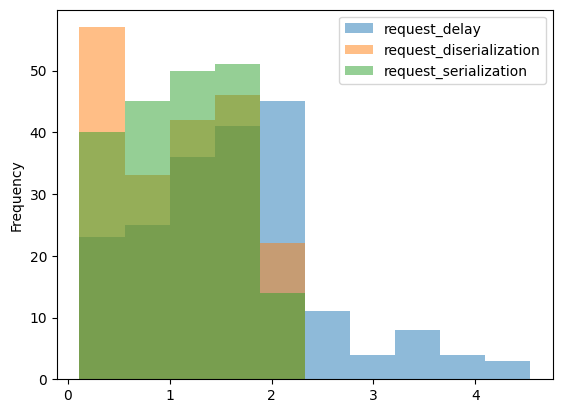

In [323]:
request_delays.plot.hist(alpha=0.5)

#### Automated Cycle Statistics

Evaluating Cycles: 100%|██████████| 200/200 [00:02<00:00, 92.01it/s]


<BarContainer object of 10 artists>

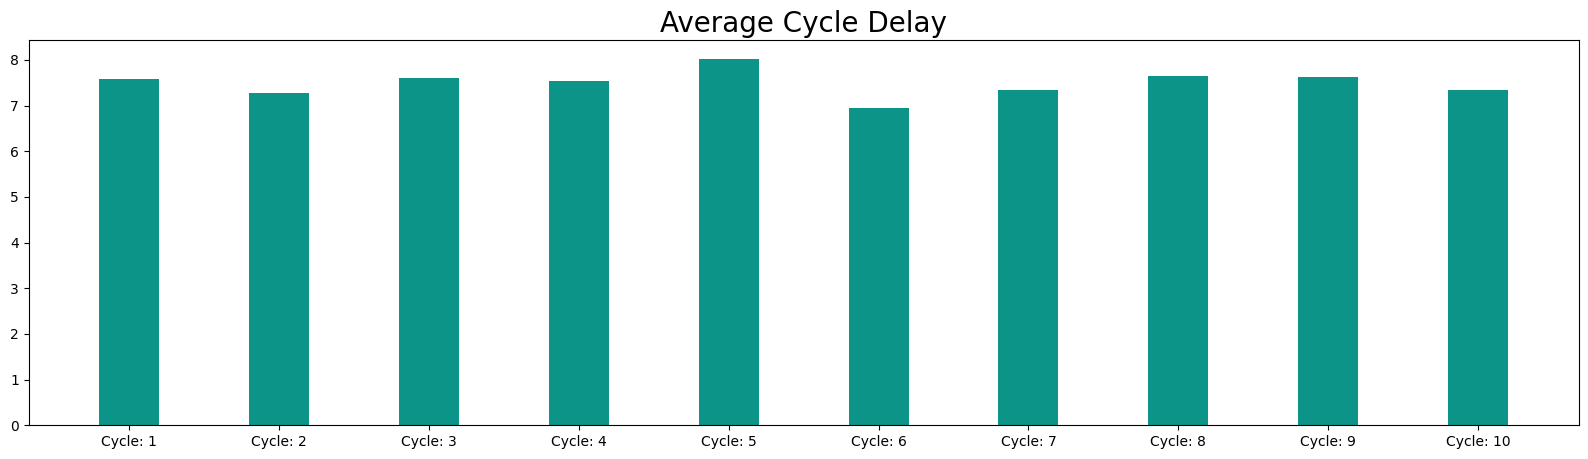

In [324]:
cycle_dataset = pd.DataFrame(cycle_data)
bar_plot_selection = cycle_dataset[['cycle', 'data_delay']]
bar_plot_data = {}


temp : Dict[str, List[float]] = {}

cycle_col_one_list = bar_plot_selection['cycle'].tolist()
cycle_col_two_list  = bar_plot_selection['data_delay'].tolist()

for cycle in tqdm(range(len(cycle_col_one_list)), desc="Evaluating Cycles"):
    sleep(0.01)
    if cycle_col_one_list[cycle] in temp.keys():
        list_of_floats = temp[cycle_col_one_list[cycle]]
        list_of_floats.append(cycle_col_two_list[cycle])
        temp.update({
            cycle_col_one_list[cycle] : list_of_floats
        })
    else:
        list_of_floats = []
        list_of_floats.append(cycle_col_two_list[cycle])
        temp.update({
            cycle_col_one_list[cycle] : list_of_floats
        })

for cycle, list_of_delays in temp.items():
    avg = round(sum(list_of_delays) / len(list_of_delays),8)
    bar_plot_data.update({
        cycle : avg
    })


plt.figure(figsize=(20,5))
plt.title("Average Cycle Delay", size = 20)
plt.bar(bar_plot_data.keys(), bar_plot_data.values(), width=0.4, color= "#0d9488")

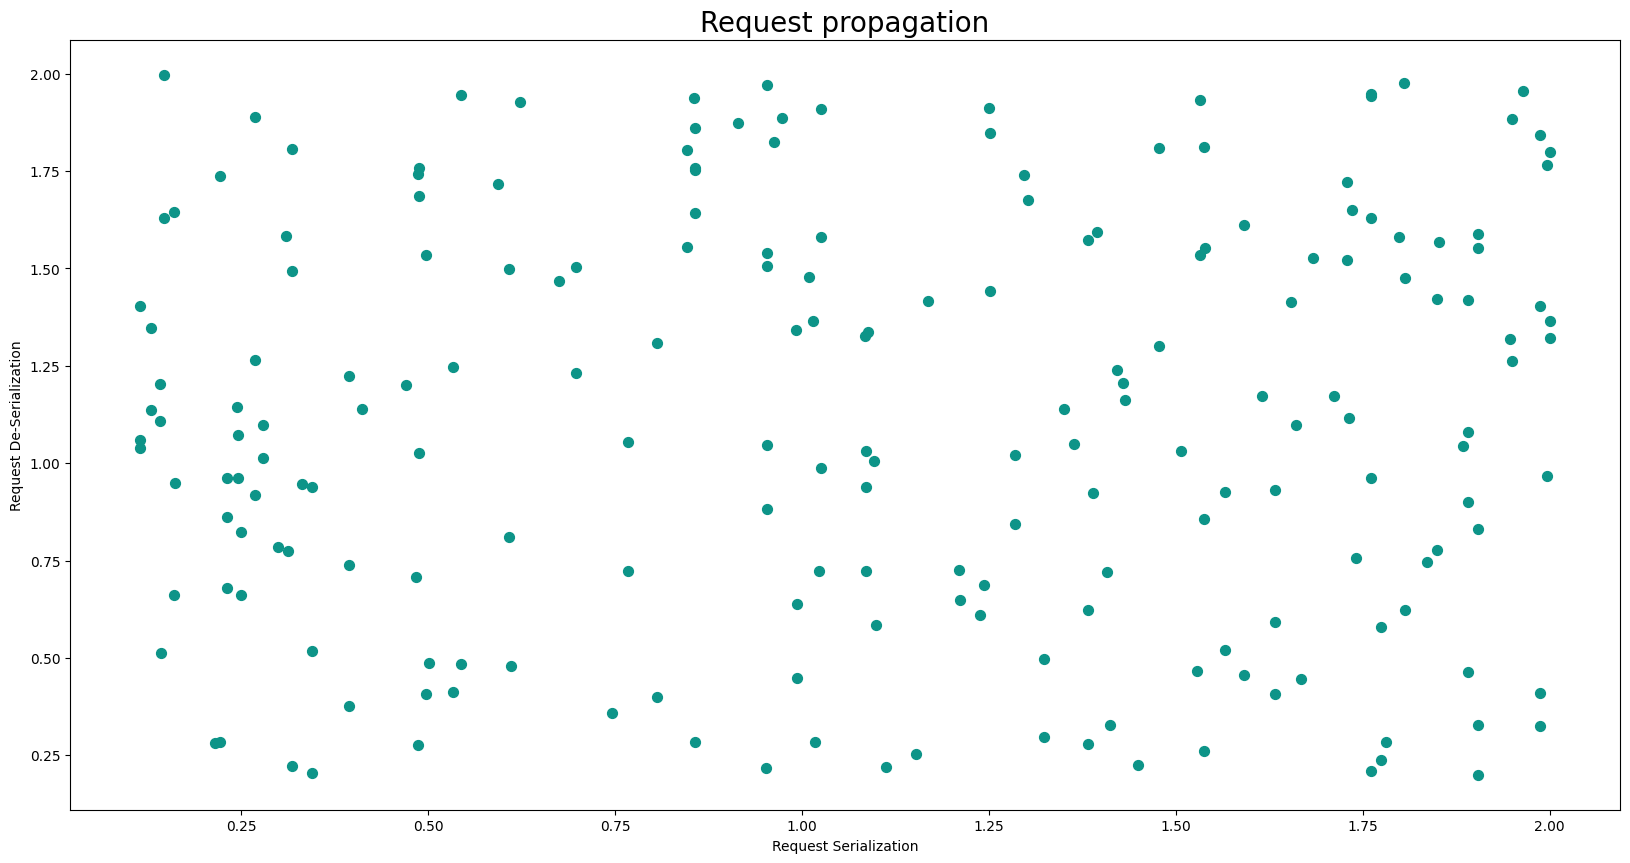

In [325]:
plt.figure(figsize=(20,10))
plt.title("Request propagation", size = 20)
plt.xlabel("Request Serialization")
plt.ylabel("Request De-Serialization")
plt.scatter(request_delays['request_diserialization'], request_delays["request_serialization"] , c="#0d9488", s= 50)
plt.show()

### Request and Response

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

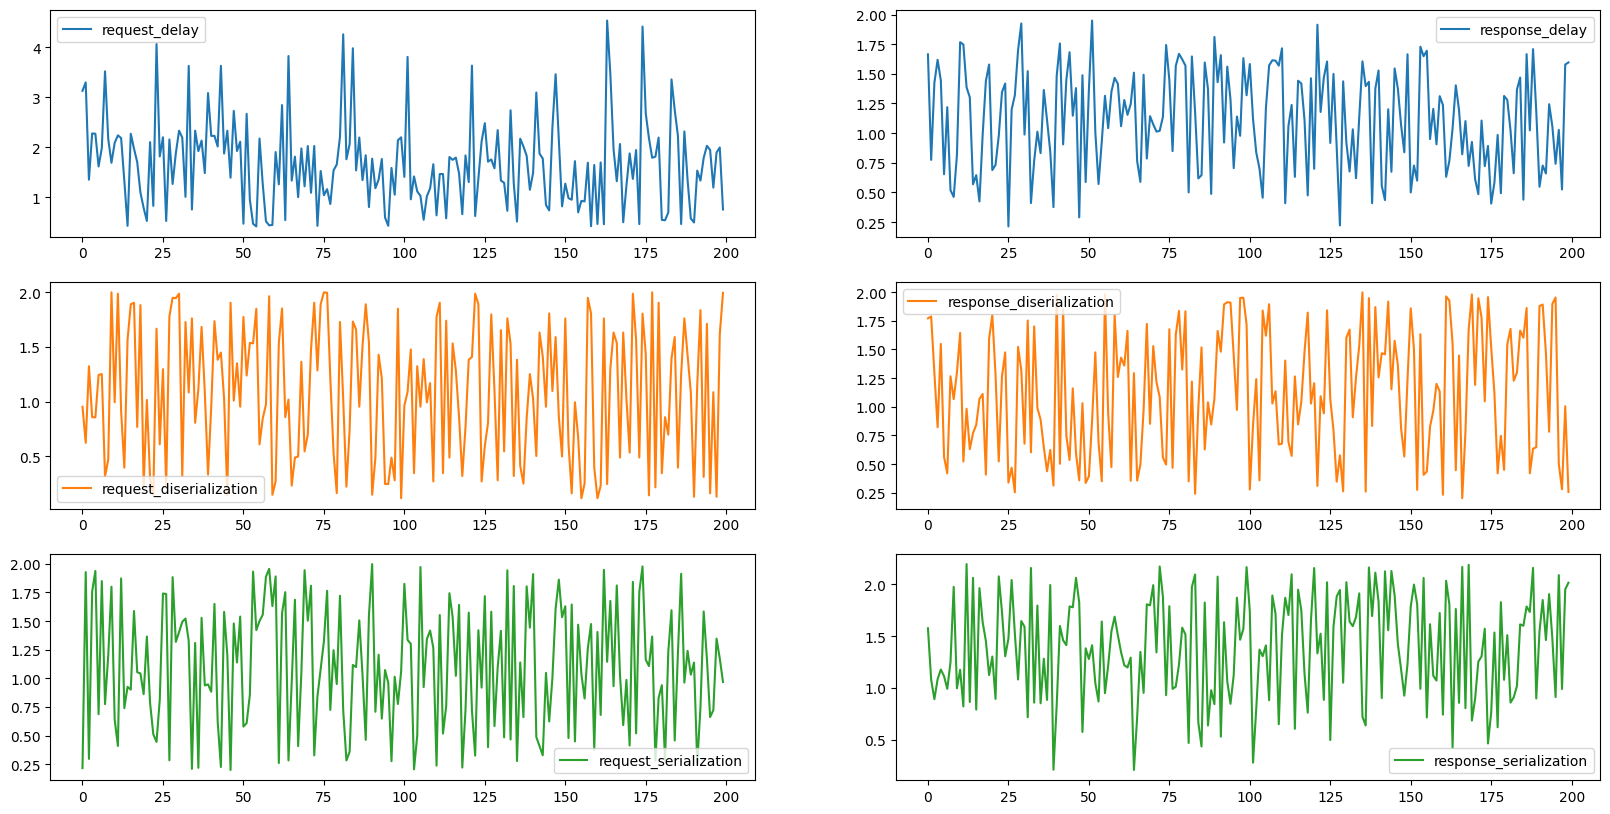

In [326]:
fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(20,10))
request_delays.plot(ax = axes[:,0], subplots=True)
response_delays.plot(ax = axes[:,1], subplots=True)

## Manual

Text(0.5, 0, 'Simulation Call')

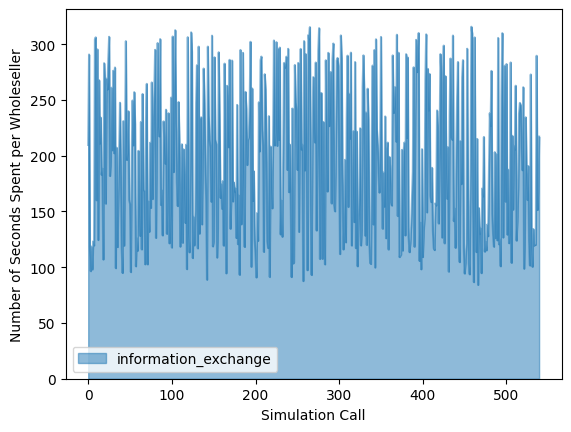

In [327]:
manual_delay = manual_dataset[["information_exchange"]]

manual_delay.plot.area(alpha=0.5)
plt.ylabel('Number of Seconds Spent per Wholeseller')
plt.xlabel('Simulation Call')

Text(0.04, 0.5, 'Delay in Seconds')

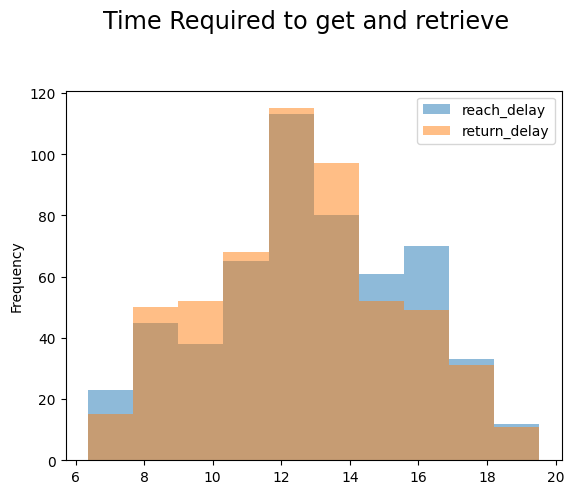

In [328]:
time_wasted_in_calling = manual_dataset[["reach_delay", "return_delay"]]

time_wasted_in_calling.plot.hist(alpha=0.5)
plt.suptitle('Time Required to get and retrieve', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'Number of Occurences', ha='center')
fig.text(0.04, 0.5, 'Delay in Seconds', va='center', rotation='vertical')

## Comparison

### Information Gathering

Text(0.04, 0.5, 'Number of common results')

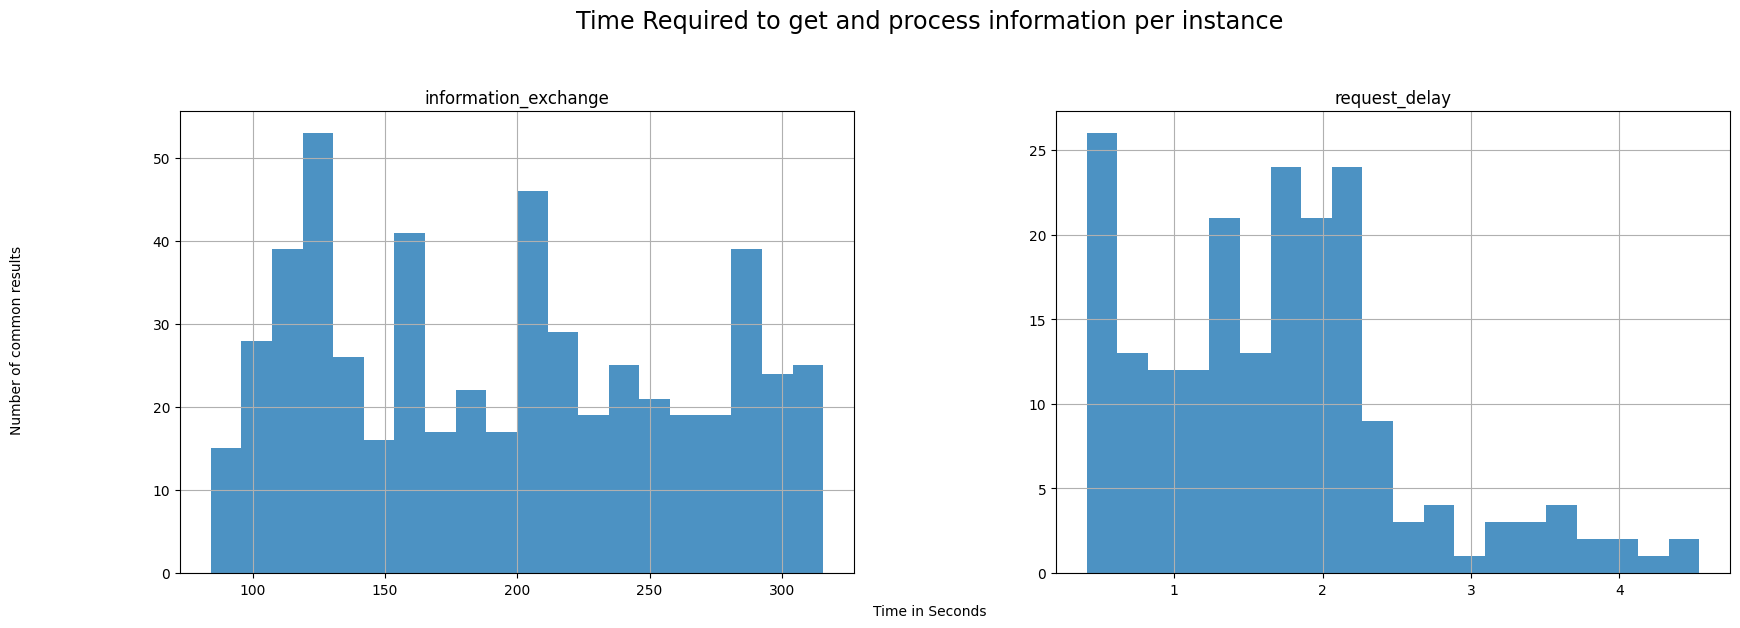

In [329]:
fig, axes = plt.subplots(1, 2, figsize= (20,6))
manual_delay.hist('information_exchange', bins=20, ax=axes[0], alpha = 0.8)

request_delays.hist('request_delay', bins=20, ax=axes[1], alpha = 0.8)

plt.suptitle('Time Required to get and process information per instance', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'Time in Seconds', ha='center')
fig.text(0.04, 0.5, 'Number of common results', va='center', rotation='vertical')

### Magnitutde of difference - Delay

Text(0.5, 0, 'Magnitude of difference (in power)')

<Figure size 640x480 with 0 Axes>

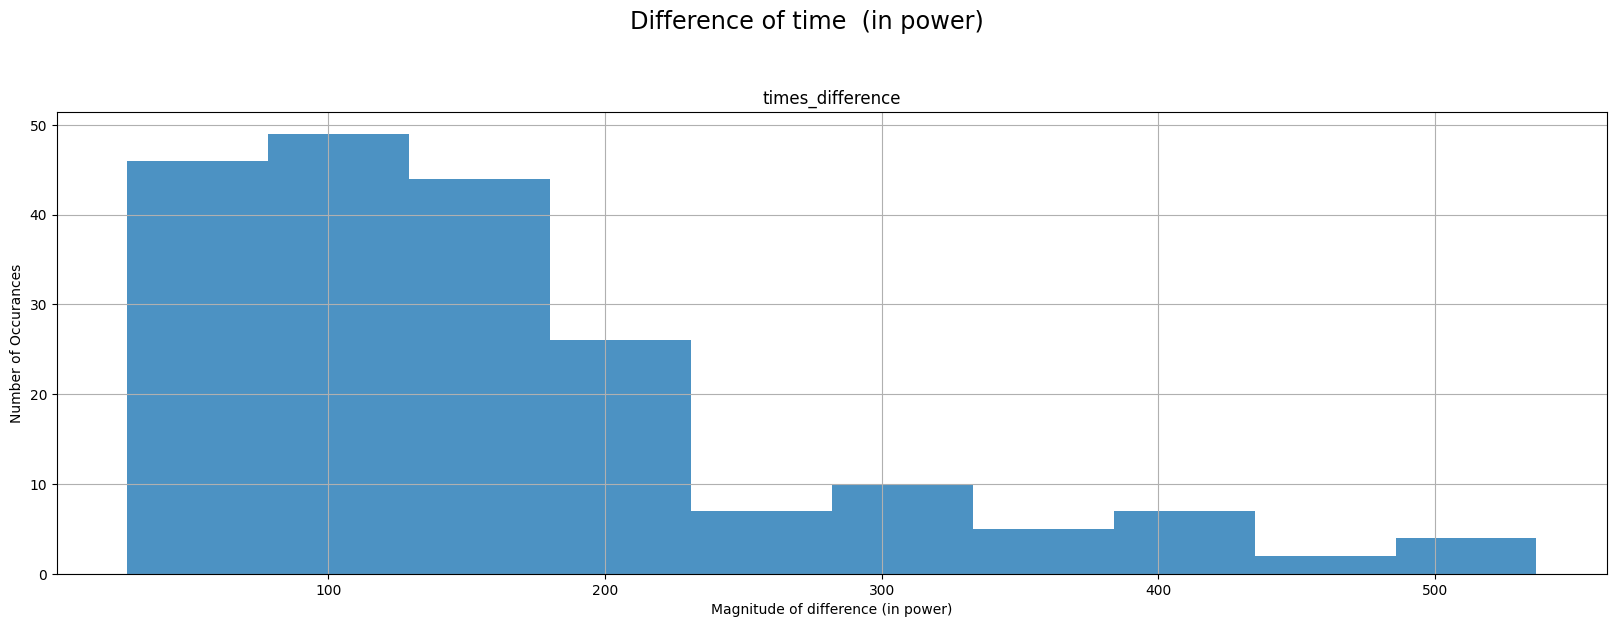

In [330]:
magnitude_dataset = pd.DataFrame()

magnitude_dataset['times_difference'] = manual_delay['information_exchange'] / request_delays['request_delay']

plt.figure()
magnitude_dataset.hist(bins=10, ylabelsize=10, figsize=(20, 6), alpha=0.8)
plt.suptitle('Difference of time  (in power)', x=0.5, y=1.05, ha='center', fontsize='xx-large')
plt.ylabel('Number of Occurances')
plt.xlabel('Magnitude of difference (in power)')

### Information Accuracy

Text(0.04, 0.5, 'Number of similar performances')

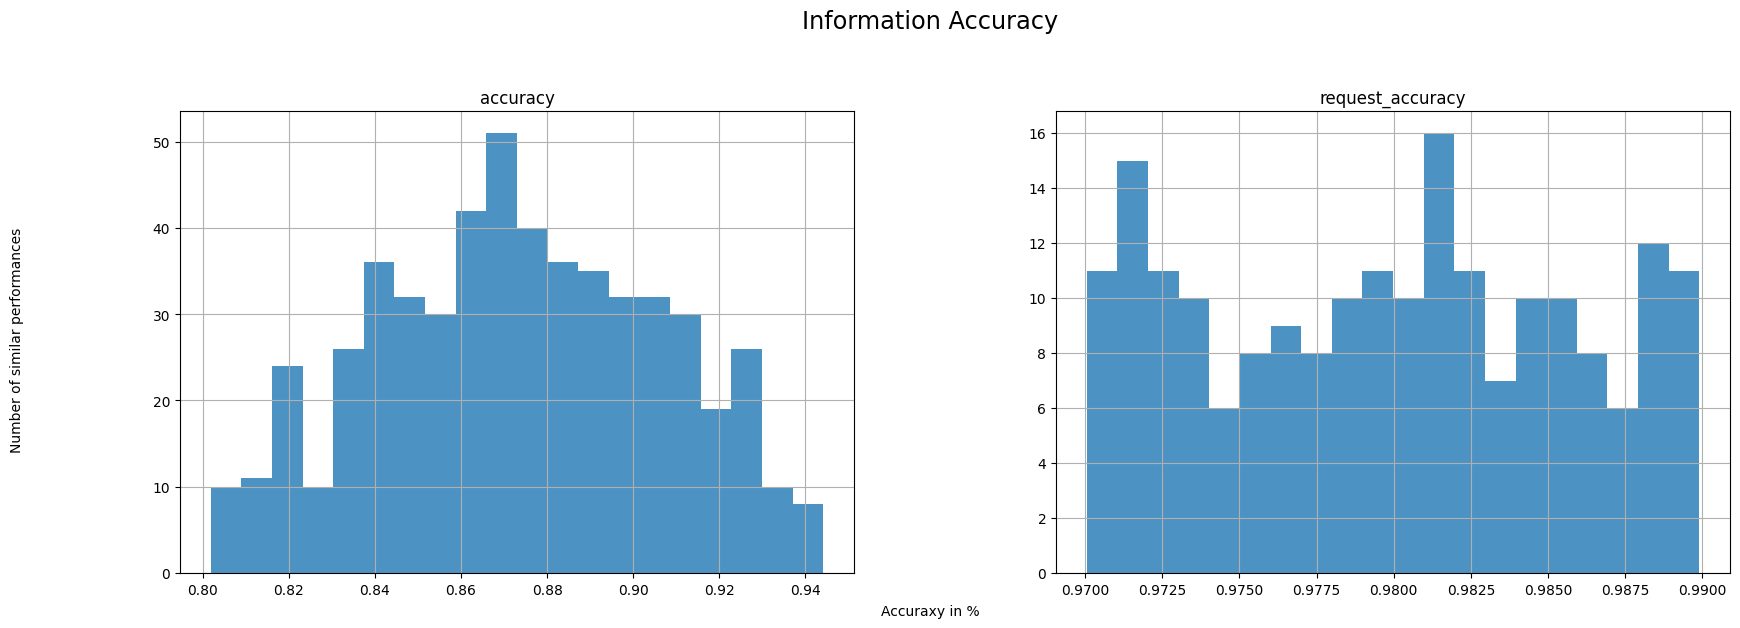

In [331]:
fig, axes = plt.subplots(1, 2, figsize= (20,6))
manual_accuracy_dataset = manual_dataset[["accuracy"]]
manual_accuracy_dataset.hist('accuracy', bins=20, ax=axes[0], alpha = 0.8)

request_accuracy_dataset = request_dataset[["request_accuracy"]]
request_accuracy_dataset.hist('request_accuracy', bins=20, ax=axes[1], alpha = 0.8)

plt.suptitle('Information Accuracy', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'Accuraxy in %', ha='center')
fig.text(0.04, 0.5, 'Number of similar performances', va='center', rotation='vertical')

### Magnitude of Difference - Accuracy

C:\Users\PC\AppData\Local\Temp\ipykernel_18792\2604869944.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  accuracy_magnitude = round(float(1 - (magnitude_dataset.sum() / 100)),4)


Text(0.5, 0, 'Magnitude of difference %')

<Figure size 640x480 with 0 Axes>

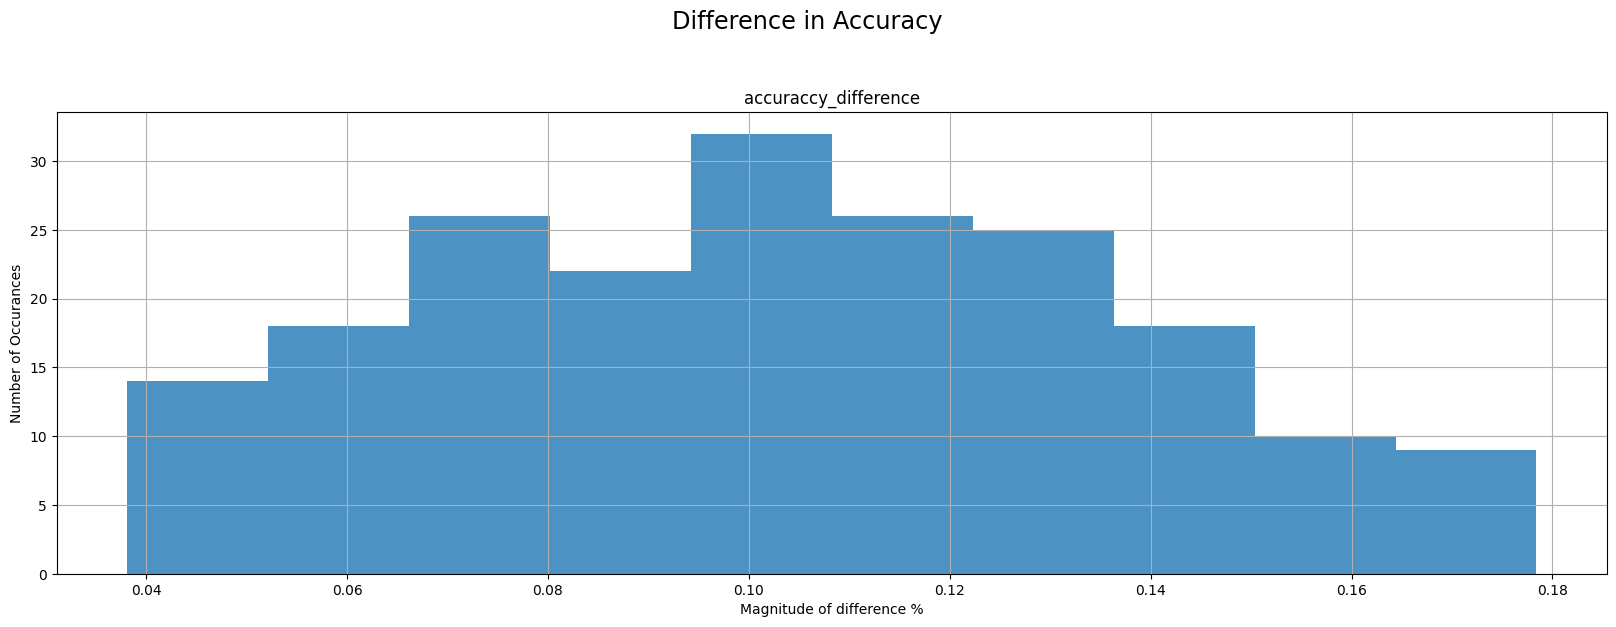

In [332]:
magnitude_dataset = pd.DataFrame()

magnitude_dataset['accuraccy_difference'] = request_accuracy_dataset['request_accuracy'] - manual_accuracy_dataset['accuracy']

accuracy_magnitude = round(float(1 - (magnitude_dataset.sum() / 100)),4)

plt.figure()
magnitude_dataset.hist(bins=10, ylabelsize=10, figsize=(20, 6), alpha=0.8)
plt.suptitle('Difference in Accuracy', x=0.5, y=1.05, ha='center', fontsize='xx-large')
plt.ylabel('Number of Occurances')
plt.xlabel('Magnitude of difference %')


### Cost Of Truck Trips

Text(0.04, 0.5, 'Cost of trip ( in 10s )')

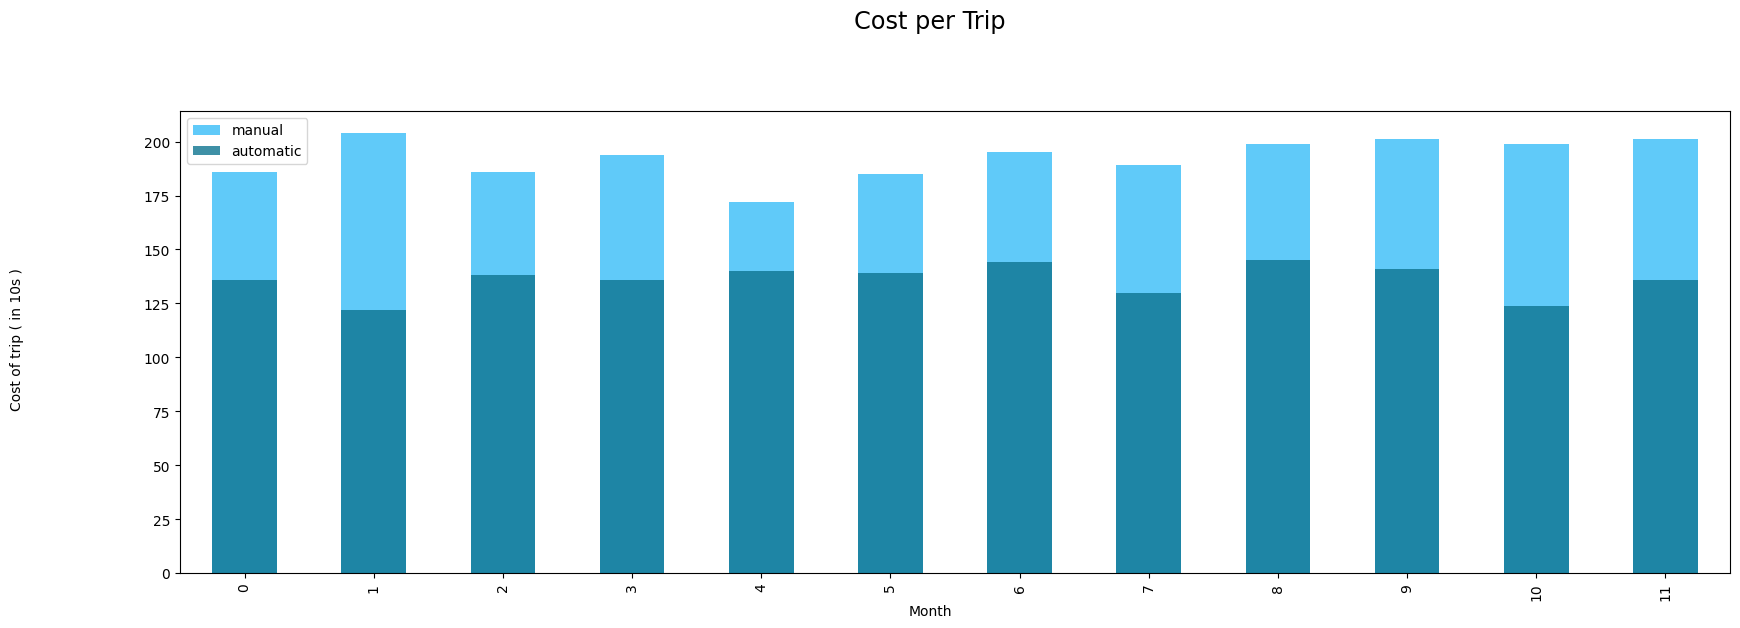

In [333]:
g_index = generate_g_index(chosen_scale, accuracy_magnitude)
yearly_average_adjusted = generate_adjusted_yearly_average(average, g_index)
yearly_average_adjusted_dataframe = pd.DataFrame(yearly_average_adjusted)

fig, axe = plt.subplots( figsize= (20,6))
average_dataframe["cost_per_trip"].plot.bar(alpha = 0.8, x=average_dataframe['month'], color= "#38bdf8")

yearly_average_adjusted_dataframe["cost_per_trip"].plot.bar(alpha = 0.8, x=yearly_average_adjusted_dataframe['month'], color="#0e7490")


axe.legend(["manual", "automatic"])
plt.suptitle('Cost per Trip', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'Month', ha='center')
fig.text(0.04, 0.5, 'Cost of trip ( in 10s )', va='center', rotation='vertical')


#### Fuel Per Trip

Text(0.04, 0.5, 'Cost of trip ( in 10s )')

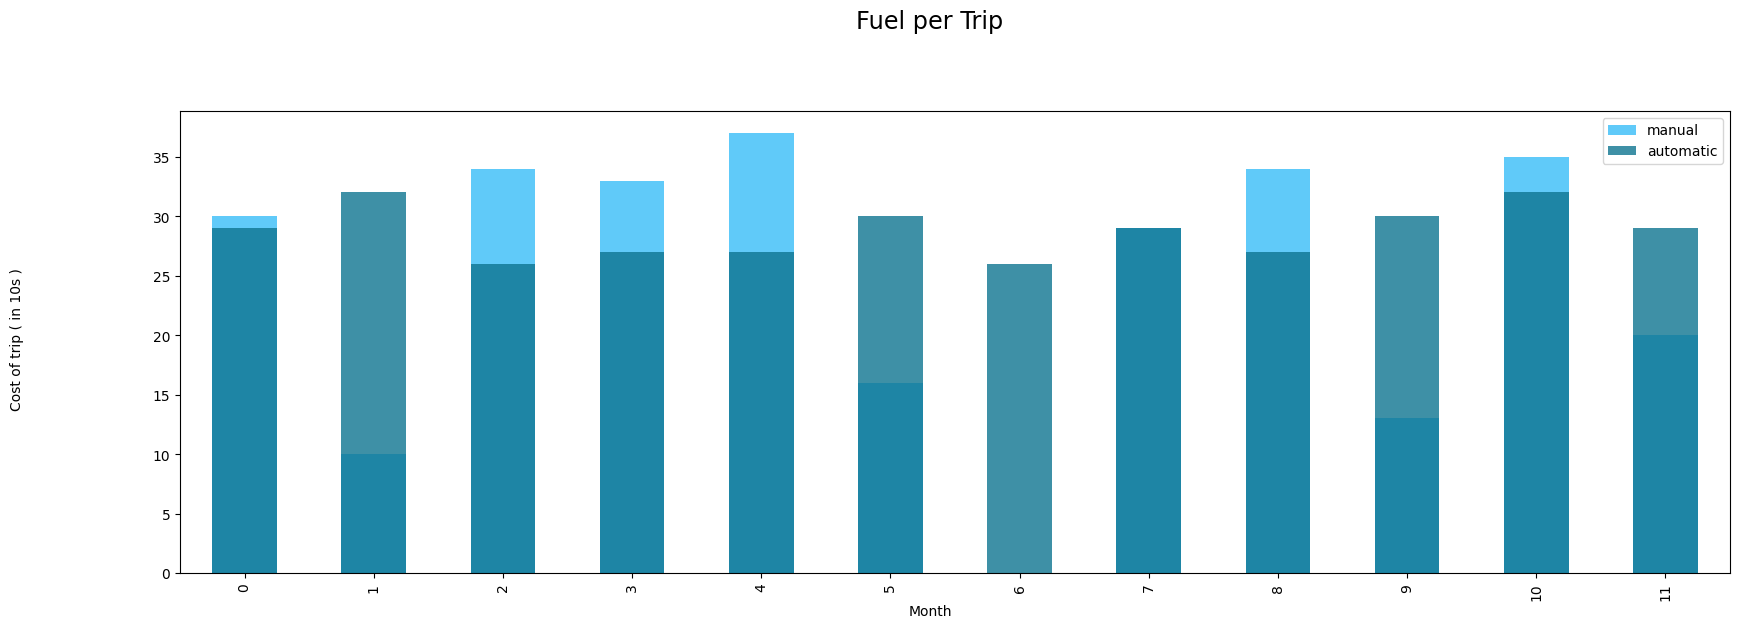

In [334]:
fig, axe = plt.subplots( figsize= (20,6))
average_dataframe["fuel_per_trip"].plot.bar(alpha = 0.8, x=average_dataframe['month'], color= "#38bdf8")

yearly_average_adjusted_dataframe["fuel_per_trip"].plot.bar(alpha = 0.8, x=yearly_average_adjusted_dataframe['month'], color="#0e7490")


axe.legend(["manual", "automatic"])
plt.suptitle('Fuel per Trip', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'Month', ha='center')
fig.text(0.04, 0.5, 'Cost of trip ( in 10s )', va='center', rotation='vertical')


#### Carbon Emmissions Per Month

Text(0.04, 0.5, 'Emissions in kgs')

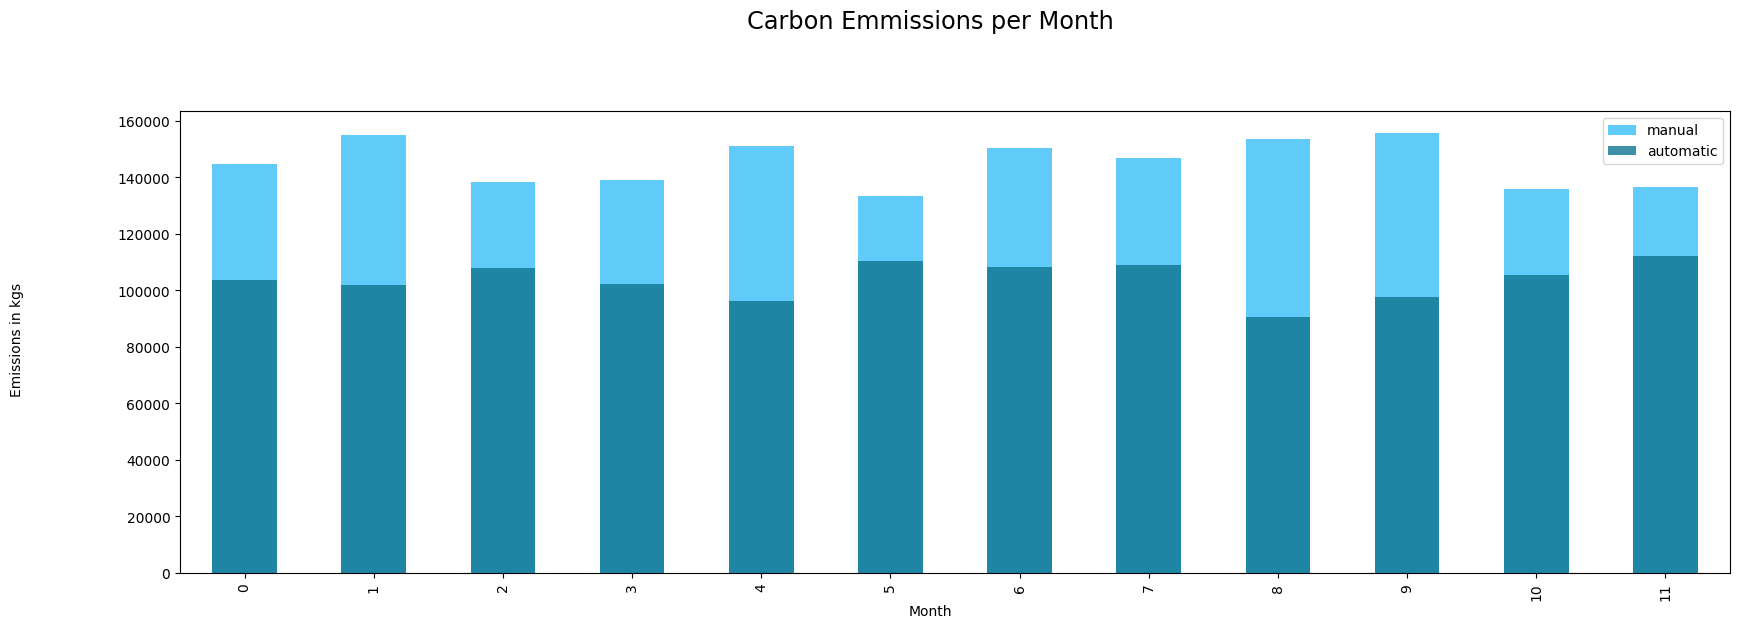

In [335]:
fig, axe = plt.subplots( figsize= (20,6))
average_dataframe["carbon_per_month"].plot.bar(alpha = 0.8, x=average_dataframe['month'], color= "#38bdf8")

yearly_average_adjusted_dataframe["carbon_per_month"].plot.bar(alpha = 0.8, x=yearly_average_adjusted_dataframe['month'], color="#0e7490")


axe.legend(["manual", "automatic"])
plt.suptitle('Carbon Emmissions per Month', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'Month', ha='center')
fig.text(0.04, 0.5, 'Emissions in kgs', va='center', rotation='vertical')


#### Distance Per Trip Per Month


Text(0.04, 0.5, 'Trip Distance (in km)')

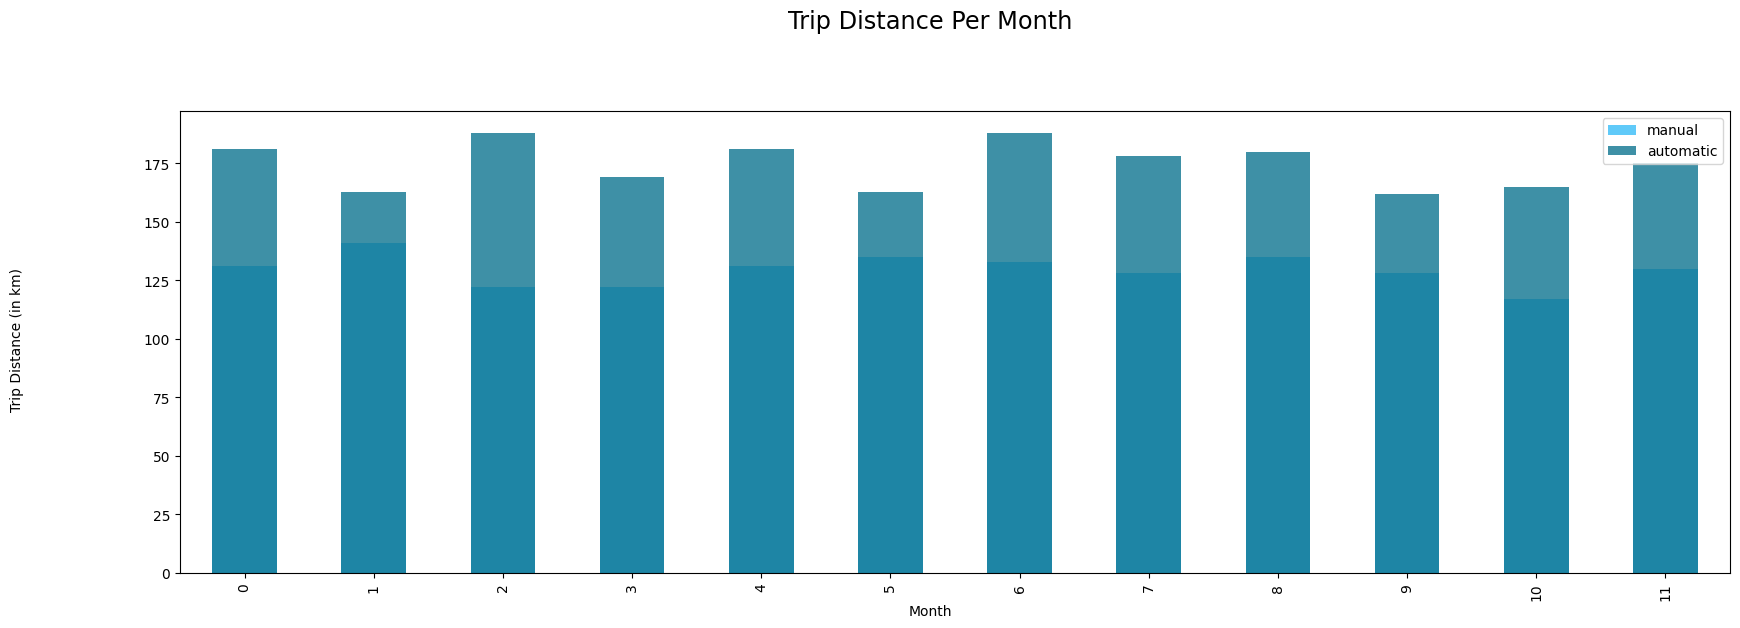

In [336]:
fig, axe = plt.subplots( figsize= (20,6))
average_dataframe["distance_per_trip"].plot.bar(alpha = 0.8, x=average_dataframe['month'], color= "#38bdf8")

yearly_average_adjusted_dataframe["distance_per_trip"].plot.bar(alpha = 0.8, x=yearly_average_adjusted_dataframe['month'], color="#0e7490")


axe.legend(["manual", "automatic"])
plt.suptitle('Trip Distance Per Month', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'Month', ha='center')
fig.text(0.04, 0.5, 'Trip Distance (in km)', va='center', rotation='vertical')


#### Difference in Empty Palettes per Month


Text(0.04, 0.5, 'Trip Distance (in km)')

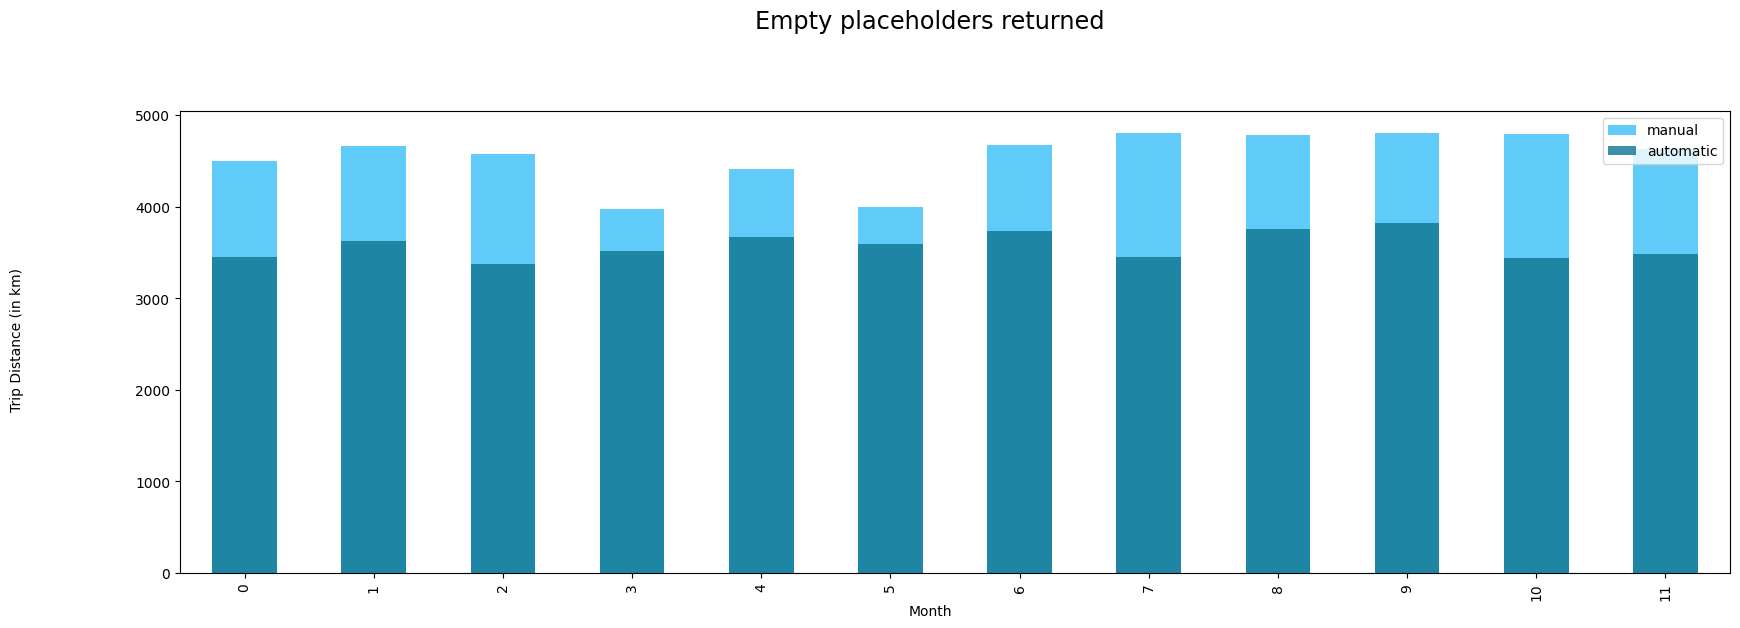

In [337]:
fig, axe = plt.subplots( figsize= (20,6))
average_dataframe["empties"].plot.bar(alpha = 0.8, x=average_dataframe['month'], color= "#38bdf8")

yearly_average_adjusted_dataframe["empties"].plot.bar(alpha = 0.8, x=yearly_average_adjusted_dataframe['month'], color="#0e7490")


axe.legend(["manual", "automatic"])
plt.suptitle('Empty placeholders returned', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'Month', ha='center')
fig.text(0.04, 0.5, 'Trip Distance (in km)', va='center', rotation='vertical')

#### Difference in Empty Placeholders Returned

Text(0.5, 0, 'Percentage')

<Figure size 640x480 with 0 Axes>

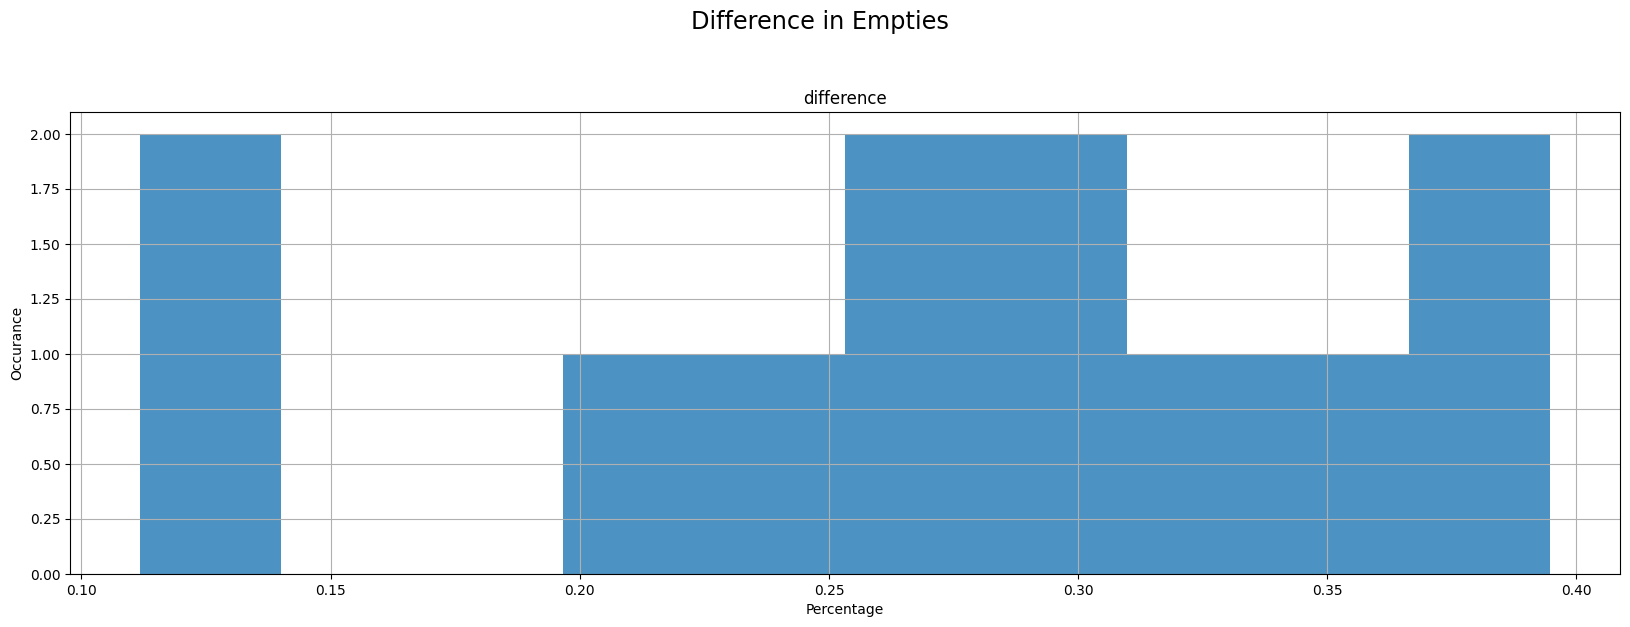

In [338]:
diff_dataframe = pd.DataFrame( columns=["difference"])

diff_dataframe["difference"] = average_dataframe["empties"] / yearly_average_adjusted_dataframe['empties'] -1


plt.figure()
diff_dataframe.hist(bins=10, ylabelsize=10, figsize=(20, 6), alpha=0.8)
plt.suptitle('Difference in Empties', x=0.5, y=1.05, ha='center', fontsize='xx-large')
plt.ylabel('Occurance')
plt.xlabel('Percentage')


#### Difference in Cost per Month

,month,trips,cost_per_trip,distance_per_trip,empties,cost,fuel_per_trip,carbon_per_month
0,January,20482,136,181,3452,23430,29,103515
1,February,22295,122,163,3624,25400,32,102027
2,March,19306,138,188,3378,25612,26,107755
3,April,22789,136,169,3516,24480,27,102217
4,May,19521,140,181,3670,23042,27,96174
5,June,21790,139,163,3594,23880,30,110460
6,July,20062,144,188,3736,27459,26,108086
7,August,19381,130,178,3444,25910,29,109055
8,September,19278,145,180,3757,27299,27,90539
9,October,22421,141,162,3826,22680,30,97536


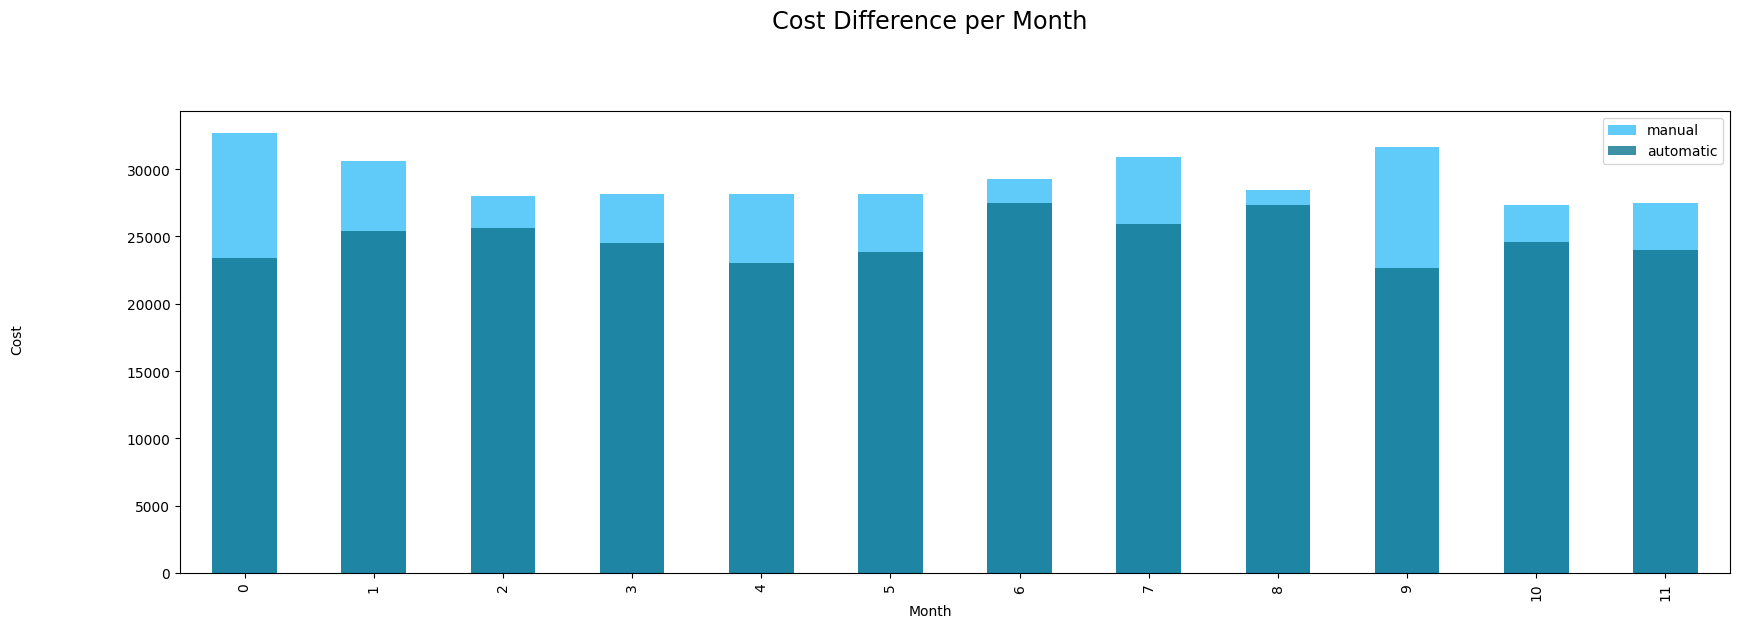

In [339]:
fig, axe = plt.subplots( figsize= (20,6))
average_dataframe["cost"].plot.bar(alpha = 0.8, x=average_dataframe['month'], color= "#38bdf8")

yearly_average_adjusted_dataframe["cost"].plot.bar(alpha = 0.8, x=yearly_average_adjusted_dataframe['month'], color="#0e7490")


axe.legend(["manual", "automatic"])
plt.suptitle('Cost Difference per Month', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'Month', ha='center')
fig.text(0.04, 0.5, 'Cost', va='center', rotation='vertical')

yearly_average_adjusted_dataframe

#### Difference in Cost

<Figure size 640x480 with 0 Axes>

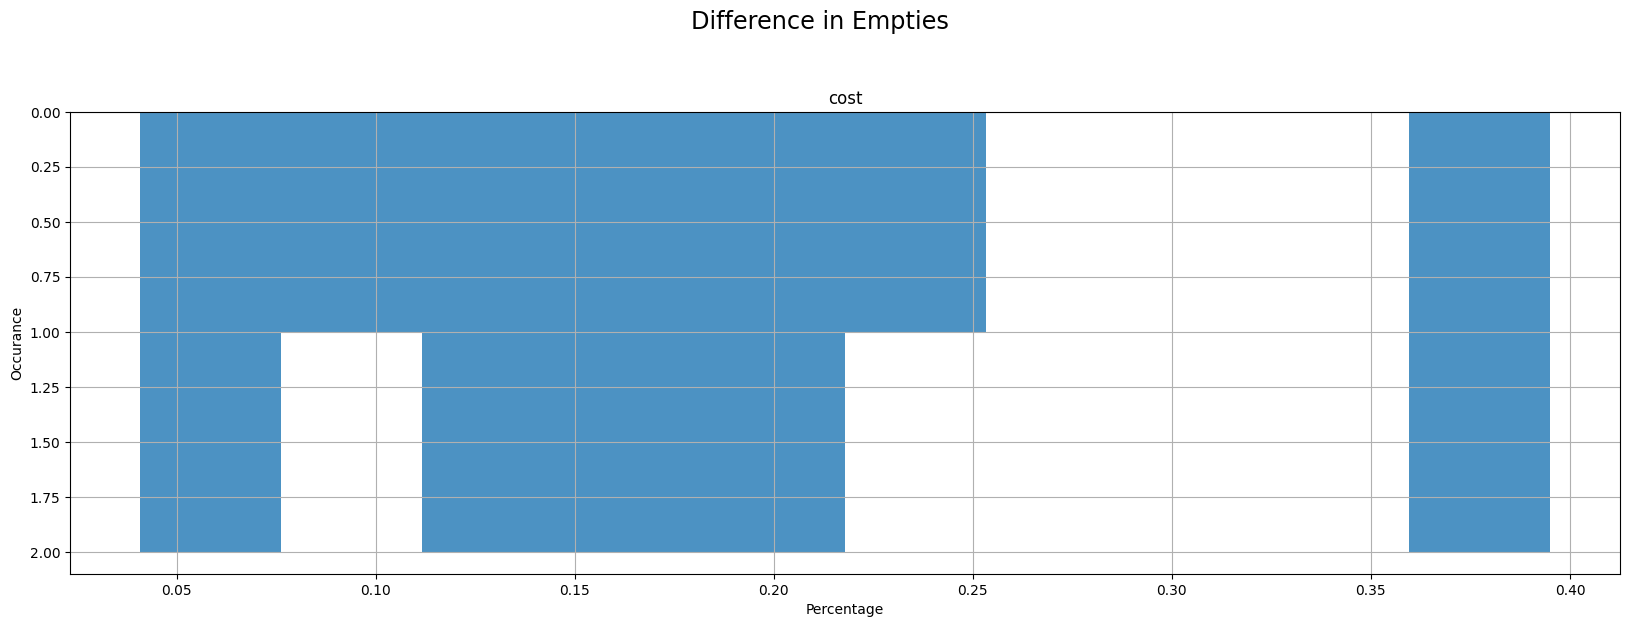

In [345]:
diff_dataframe = pd.DataFrame( columns=["difference"])

diff_dataframe["cost"] = average_dataframe["cost"] / yearly_average_adjusted_dataframe['cost'] - 1


plt.figure()
diff_dataframe.hist(bins=10, ylabelsize=10, figsize=(20, 6), alpha=0.8)
plt.suptitle('Difference in Empties', x=0.5, y=1.05, ha='center', fontsize='xx-large')
plt.ylabel('Occurance')
plt.xlabel('Percentage')
